# Introduction

In today's digital world, **Analog-to-Digital Converters (ADCs)** are everywhere—from smartphones and medical devices to industrial sensors and audio systems. They convert real-world analog signals, like sound and motion, into digital data that computers can understand.

One of the most powerful types of ADCs is the **Delta-Sigma Modulator (DSM)**, known for its **high accuracy and noise reduction**. Unlike traditional ADCs, DSMs use **oversampling and feedback loops** to improve signal quality, making them ideal for applications that require precision, such as **communication systems, and high-fidelity audio processing**.

## What This Document Covers

This work explores the **design, implementation, and analysis of Delta-Sigma ADCs** through both theory and hands-on experimentation. We will cover:

**How ADCs work**, including key components like filters, samplers, and quantizers.
**Types of ADCs**, including Flash, Successive Approximation, and Delta-Sigma.
**The practical design of a Delta-Sigma ADC system**, integrating:
-ADXL335 Accelerometer for motion sensing.
-ADS1115 ADC for signal conversion.
-ESP8266 Microcontroller for data processing and display.

**Circuit design and simulations using MATLAB/Simulink, LTSpice, and Xschem** to model and test ADC performance along with findings and challenges have been documented.

## Why Delta-Sigma ADCs?

Delta-Sigma ADCs stand out because they **filter out noise, enhance precision, and are cost-effective**. They use a clever trick—**oversampling**—to capture more signal details than conventional ADCs, making them ideal for low-frequency, high-accuracy applications.

## How This Document is Organized

This document is structured to take you from the basics of ADCs to the design, simulation, and practical implementation of Delta-Sigma ADCs. You’ll find:

-Introduction – Understanding ADCs and why Delta-Sigma is special.
-Design and Implementation – Hands-on system design using sensors, microcontrollers, and ADCs.
-Circuit Simulations – Testing and analyzing ADC performance in MATLAB, LTSpice, and Xschem.
-Applications and Challenges – Real-world uses and common design hurdles.

## Analog Signal Processing System

### **System Overview**

This documentation presents the **design and implementation** of a **Delta Sigma Modulator**. The system successfully captures real-time acceleration data, converts it into digital form, processes it using a microcontroller, and visualizes the results on a screen. The primary focus was the **ADC subsystem**, particularly the **custom Delta-Sigma Modulator (DSM)** integrated within the ADS1115, replacing the standard comparator with a **5T OTA** in the design of **1st order and 2nd order DSM**.

The system comprises the following components: - **ADXL335 Accelerometer** for motion sensing. - **ADS1115 Analog-to-Digital Converter (ADC)** for high-resolution signal conversion. - **ESP8266 Microcontroller** for processing and data transmission. - **Custom Delta-Sigma Modulator (DSM) with a 5T Operational Transconductance Amplifier (OTA)** to replace ADC.

### **Block Diagram of the System**

```{mermaid}
flowchart LR
  A["Accelerometer"] --> B[/Analog to Digital convertor/] --> C["Microcontroller"]
```

The system consists of three main blocks: an **accelerometer**, an **analog-to-digital converter (ADC)**, and a **microcontroller**. The accelerometer detects motion and generates analog voltage signals corresponding to acceleration in three axes (X, Y, and Z). These analog signals are then fed into the ADC, which converts them into a digital format for further processing. Finally, the microcontroller receives the digitized data, processes it, and transmits the results for visualization or further analysis.

#### **System Implementation on Breadboard**

The designed system has been successfully assembled on a breadboard, as shown in the image below.

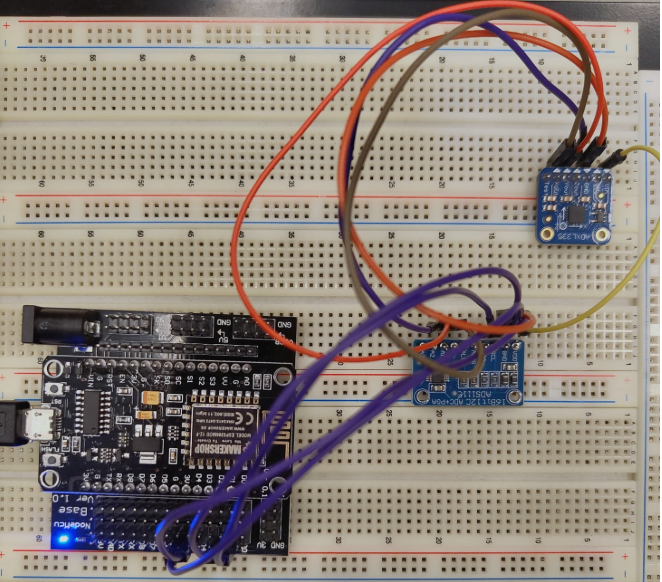

The hardware components are interconnected according to the block diagram, ensuring proper signal flow and data acquisition. The accelerometer, ADC, and microcontroller are wired to facilitate seamless communication. This physical setup validates the theoretical design and allows for real-time testing and evaluation.

This setup ensures high-precision motion sensing, making it suitable for applications such as vibration monitoring, tilt sensing, and real-time motion tracking.

## **Functional Blocks and Interfaces of our System**

### **Accelerometer (ADXL335)**

The **ADXL335** is a low-power, three-axis MEMS accelerometer by Analog Devices, capable of measuring both **static** and **dynamic accelerations** such as gravity, motion, shock, or vibration.

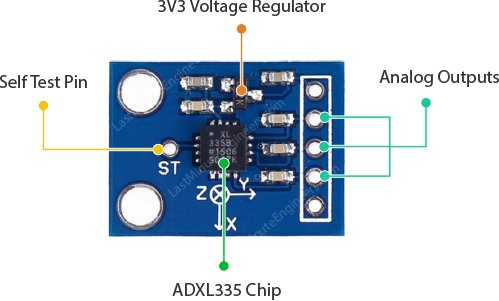

-   **Basic Functionality:** Measures acceleration in X, Y, and Z axes.
-   **Output:** Analog voltage signals proportional to acceleration.
-   **Interfacing:** Connected to ADS1115's analog input channels and outputs interfaced with ADS1115.
-   **Key Features:**

| **Feature**       | **Value**          |
|-------------------|--------------------|
| Operating Voltage | 1.8V – 3.6V        |
| Operating Current | 350μA (typical)    |
| Sensing Range     | ±3g (Full Scale)   |
| Temperature Range | −40°C to +85°C     |
| Sensing Axis      | 3 Axis             |
| Sensitivity       | 270–330mV/g        |
| Shock Resistance  | Up to 10,000g      |
| Dimensions        | 4mm x 4mm x 1.45mm |

#### MEMS Accelerometer Working Principle

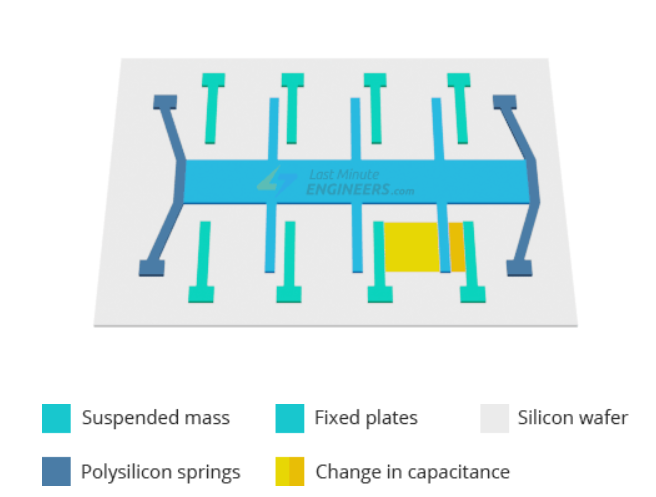

A **MEMS (Micro-Electro-Mechanical System) accelerometer** is a tiny structure built on a silicon wafer, suspended by **polysilicon springs**. When the sensor experiences acceleration along the X, Y, and/or Z axes, the suspended structure moves, causing a change in **capacitance** between fixed plates and the attached plates. This change is proportional to the acceleration, and the sensor converts it into an **analog output voltage**.

-   **Reference:** [ADXL335 Datasheet](https://www.analog.com/en/products/adxl335.html#product-overview) \| [ADXL335 working](https://lastminuteengineers.com/adxl335-accelerometer-arduino-tutorial/)

### **Analog-to-Digital Converter (ADS1115)**

-   **Reasons why we use the ADC as an intermediate block between the Accelerometer and the Microcontroller:**
    -   **Higher Resolution:** ADS1115 provides more accurate readings than the ESP8266's built-in ADC.
    -   **Lower Noise:** ADS1115 minimizes noise interference for cleaner data.
    -   **Programmability:** ADS1115 offers flexible configuration for optimal performance.
    -   **Reduced ESP8266 Load:** Offloads ADC tasks, freeing up resources for other functions.
    -   **Simplified Interfacing:** I2C communication simplifies wiring and reduces pin count.

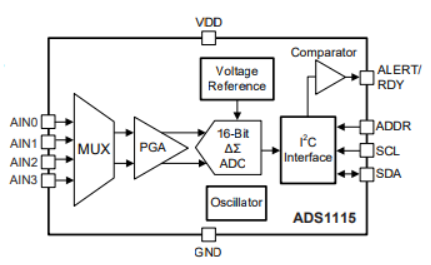

-   **Function:** Converts the analog signal from ADXL335 to a 16-bit digital output.
-   **Internal Components:**
    -   **Multiplexer (MUX):** Selects input channels
    -   **Programmable Gain Amplifier (PGA):** Enhances signal resolution
    -   **Delta-Sigma ADC:** Converts analog to digital signal
    -   **Comparator:** Used for threshold-based signal analysis
-   **Modes of Operation:**
    -   Continuous conversion mode
    -   Single-shot conversion mode (low-power optimization)

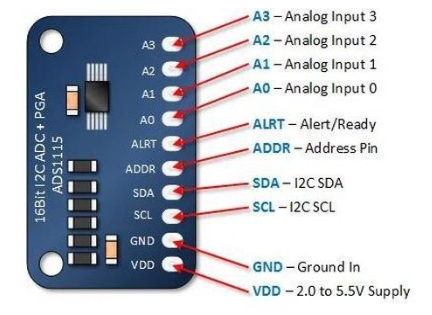 - **Specifications:** - Resolution: 16-bit - Input range: ±256 mV to ±6.144 V - Data rate: Programmable up to 860 samples per second - Low power consumption: 150 µA (typical) - Integrated voltage reference and oscillator

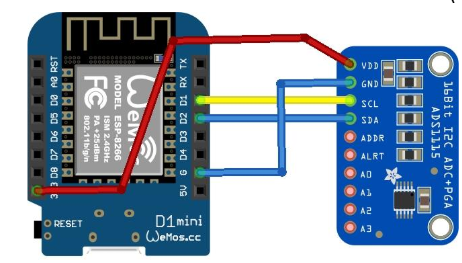 - **Interfacing:** Communicates with ESP8266 via I²C protocol.

-   **Reference:** [ADS1115 Datasheet](https://www.ti.com/product/ADS1115)

### **Microcontroller (ESP8266)**

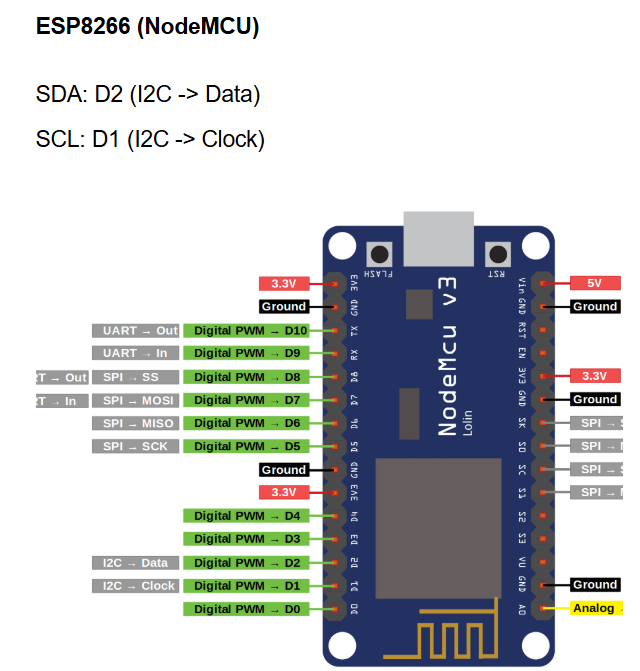

-   **Function:** Processes the digitized signal and transmits data to the laptop.
-   **Programming Interface:** Arduino IDE with I²C communication.
-   **Specifications:**
    -   80 MHz CPU frequency
    -   96KB RAM
    -   SPI/I2C/UART interfaces
-   **Reference:** [ESP8266 Documentation 1](https://docs.micropython.org/en/v1.11/esp8266/general.html) \| [ESP8266 Documentation 2](https://diyi0t.com/i2c-tutorial-for-arduino-and-esp8266)

### **IDE Code Execution (Arduino IDE)**

The following code was executed through **Arduino IDE** to initialize the system, acquire signals from the accelerometer, data conversion them by the ADC, process through Microcontroller and display the results on the laptop.

``` cpp
#include <ADS1115_WE.h>
#include <Wire.h>

#define I2C_ADDRESS 0x48

ADS1115_WE adc = ADS1115_WE(I2C_ADDRESS);

void setup() {
    Wire.begin();
    Serial.begin(9600);

    if (!adc.init()) {
        Serial.println("ADS1115 not connected!");
        while (1);
    }

    adc.setVoltageRange_mV(ADS1115_RANGE_6144);
    adc.setCompareChannels(ADS1115_COMP_0_GND);
    adc.setMeasureMode(ADS1115_CONTINUOUS);
    adc.setConvRate(ADS1115_128_SPS);

    Serial.println("ADS1115 Initialization Complete");
    Serial.println("Starting Continuous Measurement...");
    Serial.println("All values are in volts.\n");
}

void loop() {
    Serial.print("Ax: ");
    Serial.print(readChannel(ADS1115_COMP_0_GND));

    Serial.print("   Ay: ");
    Serial.print(readChannel(ADS1115_COMP_1_GND));

    Serial.print("   Az: ");
    Serial.print(readChannel(ADS1115_COMP_2_GND));

    Serial.println();
    delay(1000);
}

float readChannel(ADS1115_MUX channel) {
    adc.setCompareChannels(channel);
    return adc.getResult_V();
}
```

### **System Output and Analysis**

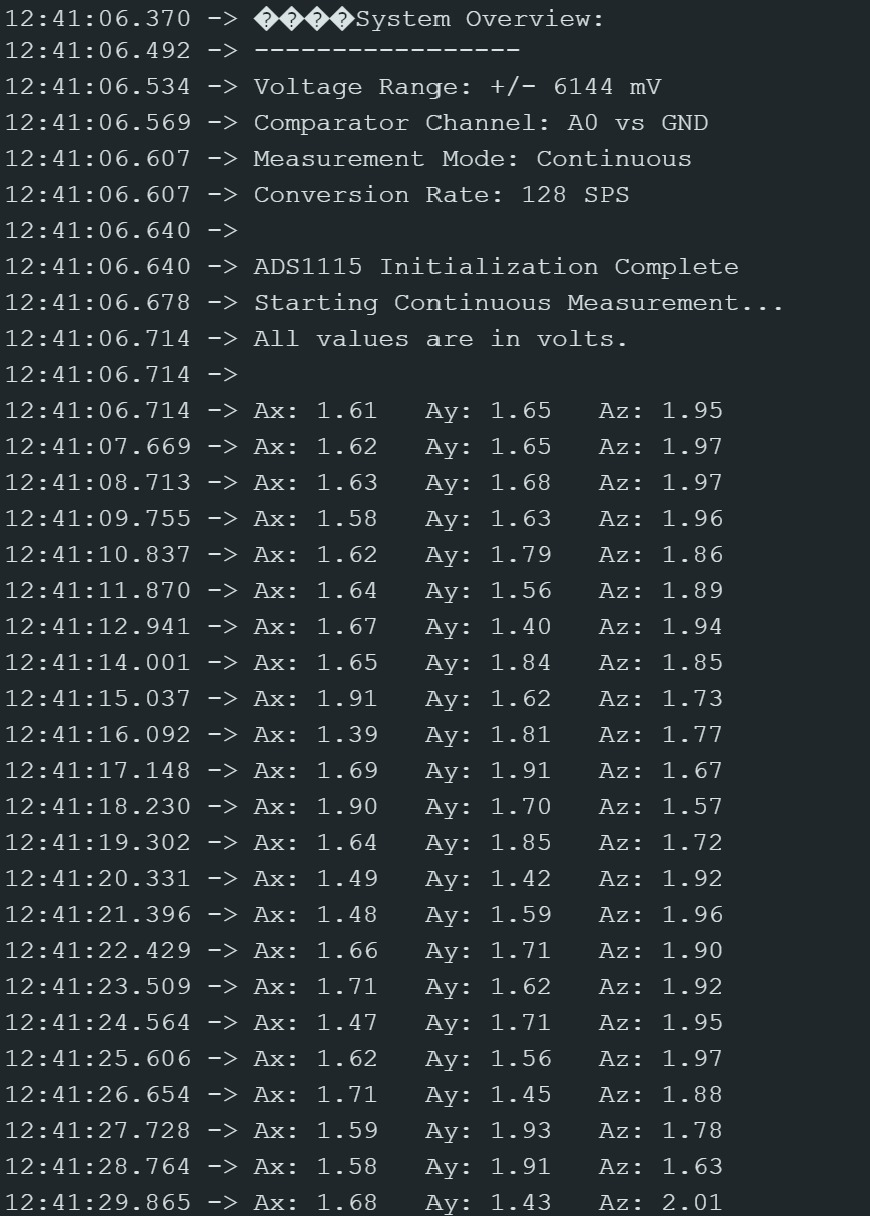

The output readings obtained from our system are as follows: - **Ax (X-axis acceleration):** Ranging from 1.39V to 1.91V - **Ay (Y-axis acceleration):** Ranging from 1.40V to 1.93V - **Az (Z-axis acceleration):** Ranging from 1.57V to 2.01V

The data showcases variations in acceleration detected by the **ADXL335 accelerometer**. As the system operates in **continuous measurement mode**, the ADC continuously samples and transmits data to the microcontroller, which then displays the results. The variations in Ax, Ay, and Az indicate changes in motion along the three axes, which can be correlated to tilting, rotation, or vibration of the sensor.

## **Signal and Interface Descriptions**

| **Block** | **Input** | **Output** | **Communication Protocol** |
|------------------|------------------|------------------|-------------------|
| ADXL335 | 3.3V Power, Motion | Analog Voltage (X, Y, Z) | Connected to ADS1115 Analog Inputs |
| ADS1115 | Analog Signals | 16-bit Digital Output | I²C Communication |
| ESP8266 | Digital Data (I²C) | Processed Data via Serial | USB (Laptop) |

# Matlab Behavioural Model and Simulink

## 1st Order Delta-Sigma Modulator

### System Model Description

A Delta-Sigma Modulator (DSM) is a key component in analog-to-digital conversion. It works by oversampling an input signal and shaping the quantization noise to high frequencies outside the signal bandwidth. This allows for increased resolution within the desired bandwidth after digital filtering and downsampling.

#### Key Components:

-   **Input Signal:** A sine wave used as the test input.
-   **Noise Transfer Function (NTF):** Shapes the quantization noise.
-   **Quantizer:** Produces a discrete output.
-   **Feedback Loop:** Ensures stability and improves accuracy.

The **1st Order DSM** consists of a single integrator in the feedback loop. The noise shaping improves the signal-to-noise ratio (SNR) by pushing the quantization noise to higher frequencies.

### Design Procedure

#### Parameters

``` matlab
L = 1;                % Order of modulator
form = 'CIFB';        % Cascade of integrator feedback
fs = 220e3;           % Sampling frequency (higher to improve resolution)
Ts = 1/fs;            % Sampling time
OSR = 256;            % Oversampling Ratio
N = 16 * OSR;         % Simulation length (output samples), FFT points
fB = fs / (2 * OSR);  % Bandwidth
cycles = 5;           % Number of sinusoids in the input
fx = cycles * fs / N; % Input test tone frequency
A = 0.7;              % Signal amplitude (scaled for input range)
t = Ts * (0:N-1);     % Time vector
u = A * sin(2 * pi * fx * t); % Input sinewave signal
```

#### Design Steps

1.  **Define Parameters:** Set modulator order, sampling frequency, oversampling ratio, and input signal.
2.  **Synthesize NTF:** Use the `synthesizeNTF` function to generate the noise transfer function.
3.  **Realize DSM:** Realize the DSM using `realizeNTF` and scale coefficients with `scaleABCD`.
4.  **Simulate DSM:** Simulate the modulator and obtain the output using `simulateDSM`.
5.  **Analyze Outputs:** Generate time-domain response, Bode plot, pole-zero plot, and spectral analysis.

### MATLAB Code

``` matlab
%% 1st Order Delta-Sigma Modulator by Peter
clc;
clear all;

%% Parameters
L = 1;                % Order of modulator
form = 'CIFB';        % Cascade of integrator feedback
fs = 220e3;           % Sampling frequency (higher to improve resolution)
Ts = 1/fs;            % Sampling time
OSR = 256;            % Oversampling Ratio
N = 16 * OSR;         % Simulation length (output samples), FFT points
fB = fs / (2 * OSR);  % Bandwidth
cycles = 5;           % Number of sinusoids in the input
fx = cycles * fs / N; % Input test tone frequency
A = 0.7;              % Signal amplitude (scaled for input range)
t = Ts * (0:N-1);     % Time vector
u = A * sin(2 * pi * fx * t); % Input sinewave signal

%% Design NTF
H = synthesizeNTF(L, OSR); % Noise Transfer Function (NTF)

%% Bode Plot
f = linspace(0, 0.5, N/2 + 1); % Normalized frequency vector
z = exp(2i * pi * f);          % Frequency domain representation
figure;
plot(f, dbv(evalTF(H, z)), 'LineWidth', 2);
grid on;
title('Bode Plot of NTF');
xlabel('Normalized Frequency (f/fs)');
ylabel('Magnitude (dB)');

%% Realize DSM and Scale Coefficients
[a, g, b, c] = realizeNTF(H, form);
b(2:end) = 0; % Modify feedback path
ABCD = stuffABCD(a, g, b, c, form);
[ABCDs, umax] = scaleABCD(ABCD); % Scale the ABCD matrix

%% Simulate DSM
[v, xn, xmax, y] = simulateDSM(u, ABCDs);

%% Time-Domain Plot of DSM
figure;
set(gca, 'fontsize', 14); % Set font size for readability

% Plot input signal (u)
plot(t, u, 'LineWidth', 2);
hold on;

% Stair-step the quantized output (v)
stairs(t, v, 'LineWidth', 2);
hold off;

% Apply scaling as per the reference
axis([min(t), max(t)/8, 1.1*min(v), 1.1*max(v)]);
grid on;

% Add labels and title
xlabel('Time t/T');
ylabel('Amplitude');
legend('u', 'v', 'Location', 'best');
title('1st Order \Sigma\Delta: Time-Domain Response');
%% Spectral Analysis (FFT)
sq = abs(fft(v));

% Normalize and process FFT
f_fft = (0:N/2-1) / N; % Frequency vector
sq_hlf = sq(1:N/2) * 2 / N;
sqdBFS = 20 * log10(sq_hlf);
sqdBFS(sqdBFS == -Inf) = -150; % Correct log(0) issues

% Signal-to-Noise Ratio (SNR) Calculation
signal_bin = cycles + 1;
noise = [sq_hlf(1:signal_bin-1), sq_hlf(signal_bin+1:end)];
snr = 10 * log10(sq_hlf(signal_bin)^2 / sum(noise.^2));

% Plot Spectral Analysis
figure;
plot(f_fft, sqdBFS, 'LineWidth', 2);
axis([0 0.25 -120 5]);
yticks(-120:10:5); % Set Y-axis ticks from -150 to 0 in steps of 10
grid on;
title(['Spectral Analysis (SNR = ', num2str(snr, '%.2f'), ' dB)']);
xlabel('Normalized Frequency (f/fs)');
ylabel('Magnitude (dBFS)');

%% Enhanced Pole-Zero Plot for Stability Visualization
figure;
hold on;

% Plot the unit circle
theta = linspace(0, 2*pi, 500);
plot(cos(theta), sin(theta), 'k--', 'LineWidth', 1.5); % Dashed unit circle

% Plot zeros and poles
scatter(real(H.z{1}), imag(H.z{1}), 100, 'bo', 'filled', 'DisplayName', 'Zeros'); % Zeros
scatter(real(H.p{1}), imag(H.p{1}), 100, 'rx', 'LineWidth', 2, 'DisplayName', 'Poles'); % Poles

% Add grid, axis equal, and labels
grid on;
axis equal;
xlabel('Real Part');
ylabel('Imaginary Part');
title('Enhanced Pole-Zero Plot with Stability Criterion');
legend('Unit Circle', 'Zeros', 'Poles', 'Location', 'best');

% Annotate stability check
if all(abs(H.p{1}) < 1)
    stability_msg = 'System is Stable (All poles inside the unit circle)';
    color = 'g';
else
    stability_msg = 'System is Unstable (Some poles outside the unit circle)';
    color = 'r';
end
text(-1.5, 1.2, stability_msg, 'FontSize', 12, 'FontWeight', 'bold', 'Color', color);

hold off;

%% Windowed FFT (Hann Window)
specHW = fft(v .* ds_hann(N)) / (N / 4);
figure;
plot(f_fft, dbv(specHW(1:N/2)), 'LineWidth', 2);
axis([0 0.23 -120 5]);
yticks(-120:10:5); % Set Y-axis ticks from -150 to 0 in steps of 10
grid on;
title('Windowed Spectral Analysis with Hann Window');
xlabel('Normalized Frequency (f/fs)');
ylabel('Magnitude (dBFS)');
```

### Graphical Outputs and Analysis

#### 1. Time-Domain Response

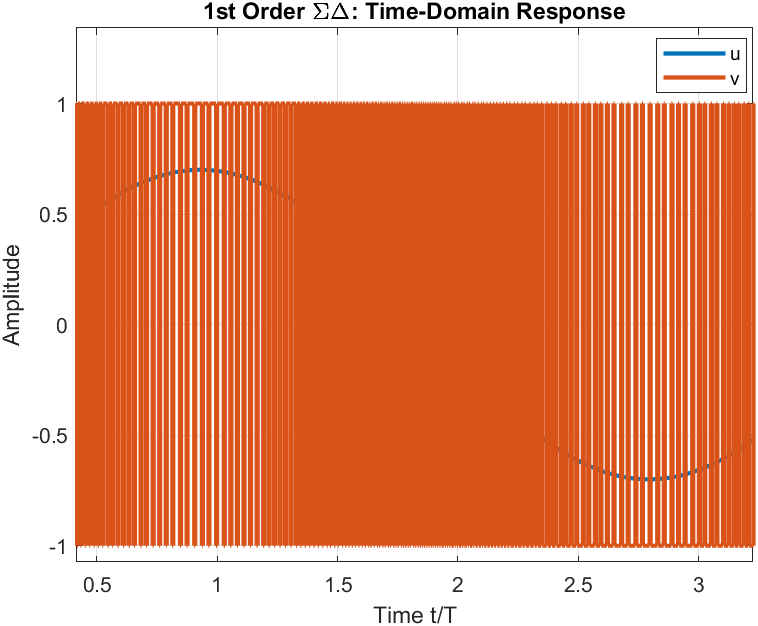

-   **Description**: This plot shows the input signal ((u)) and the quantized output signal ((v)) over time for the 1st-order DSM.
-   **Observations**:
    -   The input signal ((u)) is a continuous sinewave.
    -   The output ((v)) is a stair-stepped version of (u), reflecting quantization.
    -   Small deviations between (u) and (v) represent quantization error.
-   **Significance**: This response illustrates the quantization process. Despite the error, the output tracks the input accurately, demonstrating the modulator's performance.

#### 2. Pole-Zero Plot with Stability Criterion

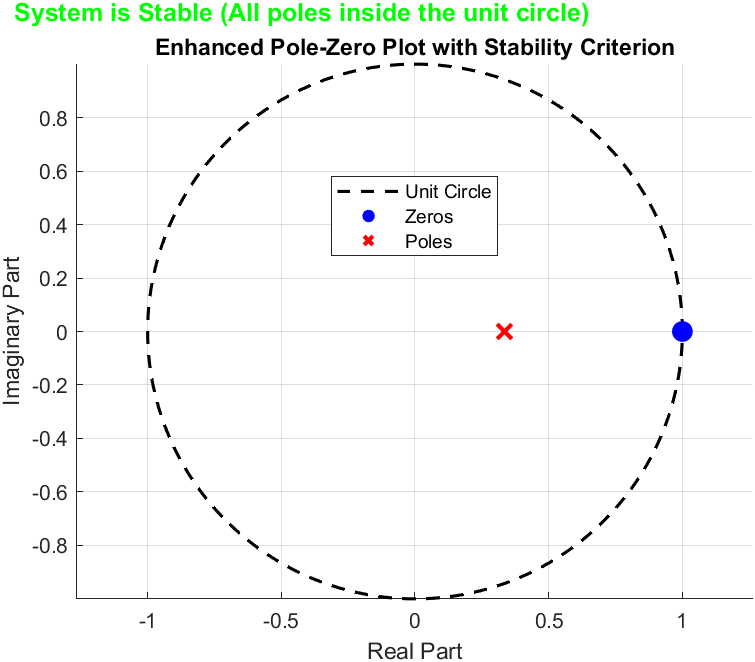

-   **Description**: This plot displays the locations of the poles and zeros of the NTF in the complex plane. The unit circle is included to assess stability.
-   **Observations**:
    -   One zero lies near the unit circle on the right-hand side.
    -   A single pole is located inside the unit circle on the left-hand side.
    -   Stability message: *System is Stable (All poles inside the unit circle)*.
-   **Significance**: The modulator is stable for the given parameters, as all poles are within the unit circle. Stability is essential for correct operation.

#### 3. Spectral Analysis

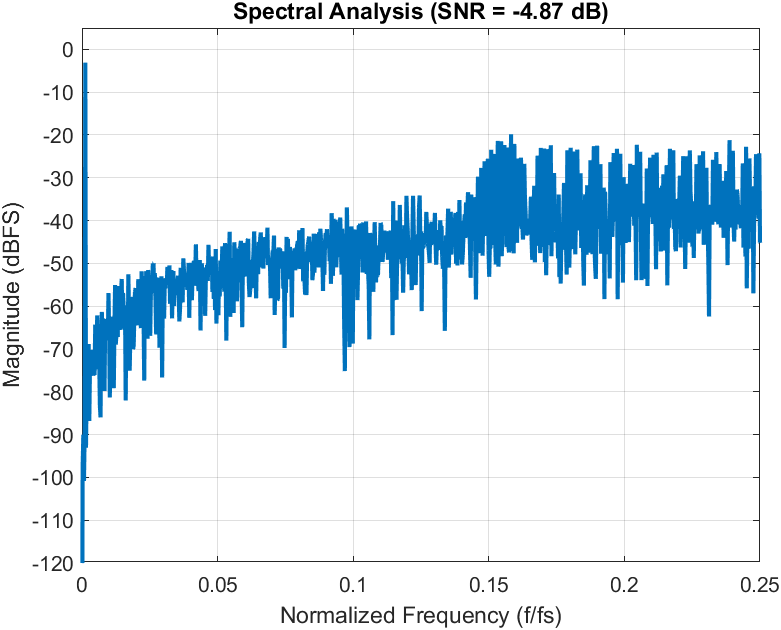

-   **Description**: This plot shows the frequency-domain representation of the modulator's output, with the signal and quantization noise plotted in decibels relative to full scale (dBFS).
-   **Observations**:
    -   A distinct peak at the test signal frequency represents the input sinewave.
    -   Quantization noise dominates the higher frequencies, as expected.
-   **Significance**: The calculated Signal-to-Noise Ratio (SNR) of ( -4.87 , \mathrm{dB} ) demonstrates the modulator's performance. Noise shaping aligns with the expected behavior of pushing noise outside the signal bandwidth.

#### 4. Bode Plot of Noise Transfer Function (NTF)

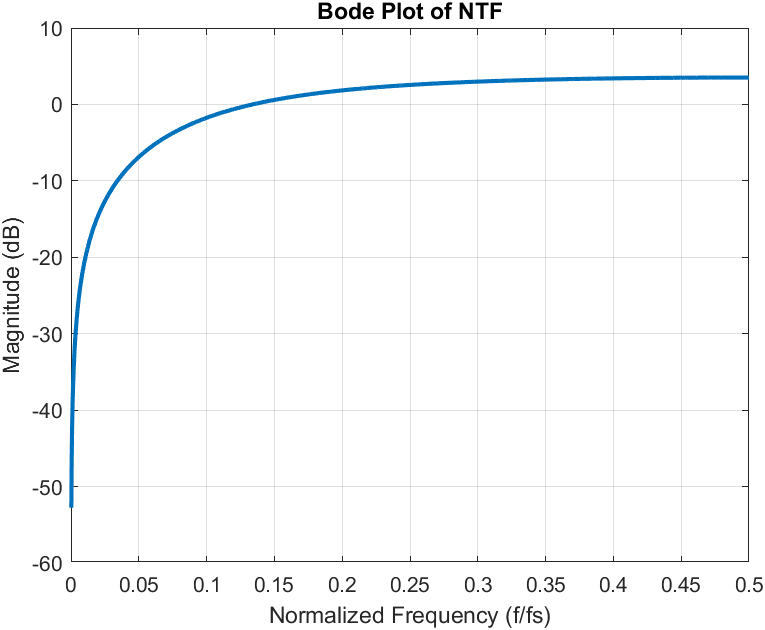

-   **Description**: This plot represents the magnitude response of the Noise Transfer Function (NTF) for the 1st-order DSM. It highlights how the modulator attenuates quantization noise at different frequencies.
-   **Observations**:
    -   At lower frequencies (normalized frequency (f/fs)), the magnitude is close to 0 dB, indicating minimal noise.
    -   As frequency increases, the magnitude rises significantly, reflecting that quantization noise is pushed to higher frequencies outside the signal bandwidth.
-   **Significance**: The NTF ensures that most quantization noise is concentrated outside the desired signal bandwidth, making it easier to filter.

#### 5. Windowed Spectral Analysis with Hann Window

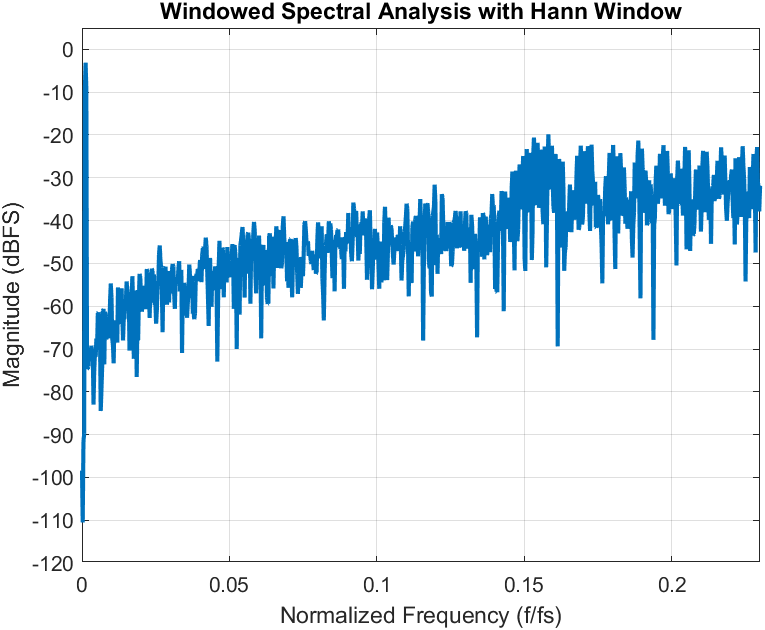

-   **Description**: This plot represents the frequency-domain analysis of the modulator's output using a Hann window to minimize spectral leakage.

-   **Observations**:

    -   A sharp peak is visible at the test signal frequency.
    -   Quantization noise is uniformly distributed across the spectrum due to the windowing effect.

### Significance:

The Hann window ensures that spectral analysis accurately reflects signal and noise characteristics, without boundary artifacts caused by FFT limitations.

### Analysis and Observations

1.  The **1st Order DSM** achieves noise shaping, pushing quantization noise to high frequencies.
2.  Stability is verified using the **Pole-Zero Plot**.
3.  The **Bode Plot** confirms the frequency response aligns with expectations for a 1st Order NTF.
4.  The **Time-Domain Response** shows accurate quantization of the sine wave.
5.  The **Spectral Analysis** validates high SNR in the signal bandwidth.

## 2nd Order Delta-Sigma Modulator

### System Model Description

A Delta-Sigma Modulator (DSM) is a critical component in analog-to-digital conversion. It operates by oversampling an input signal and shaping the quantization noise to higher frequencies outside the signal bandwidth. This approach allows for increased resolution within the desired bandwidth after digital filtering and downsampling.

#### Key Components:

-   **Input Signal:** A sine wave used as the test input.
-   **Noise Transfer Function (NTF):** Shapes the quantization noise to higher frequencies.
-   **Quantizer:** Produces discrete output values.
-   **Feedback Loop:** Ensures stability and improves accuracy.

The **2nd Order DSM** consists of two integrators in the feedback loop. This design improves noise shaping, resulting in better Signal-to-Noise Ratio (SNR) by pushing even more quantization noise to higher frequencies compared to the 1st order DSM.

### Design Procedure

#### Parameters

``` matlab
L = 2;                % Order of modulator (2nd order)
form = 'CIFB';        % Cascade of integrator feedback
fs = 220e3;           % Sampling frequency
Ts = 1/fs;            % Sampling time
OSR = 256;            % Oversampling Ratio
N = 16 * OSR;         % Simulation length (output samples), FFT points
fB = fs / (2 * OSR);  % Bandwidth
cycles = 5;           % Number of sinusoids in the input
fx = cycles * fs / N; % Input test tone frequency
A = 0.7;              % Signal amplitude (scaled for input range)
t = Ts * (0:N-1);     % Time vector
u = A * sin(2 * pi * fx * t); % Input sinewave signal
```

#### Design Steps

1.  **Define Parameters:** Set modulator order, sampling frequency, oversampling ratio, and input signal.
2.  **Synthesize NTF:** Use the `synthesizeNTF` function to generate the noise transfer function.
3.  **Realize DSM:** Realize the DSM using `realizeNTF` and scale coefficients with `scaleABCD`.
4.  **Simulate DSM:** Simulate the modulator and obtain the output using `simulateDSM`.
5.  **Analyze Outputs:** Generate time-domain response, Bode plot, pole-zero plot, and spectral analysis.

### MATLAB Code

``` matlab
%% 2nd Order Delta-Sigma Modulator by Peter
clc;
clear all;

%% Parameters
L = 2;                % Order of modulator (2nd order)
form = 'CIFB';        % Cascade of integrator feedback
fs = 220e3;           % Sampling frequency
Ts = 1/fs;            % Sampling time
OSR = 256;            % Oversampling Ratio
N = 16 * OSR;         % Simulation length (output samples), FFT points
fB = fs / (2 * OSR);  % Bandwidth
cycles = 5;           % Number of sinusoids in the input
fx = cycles * fs / N; % Input test tone frequency
A = 0.7;              % Signal amplitude (scaled for input range)
t = Ts * (0:N-1);     % Time vector
u = A * sin(2 * pi * fx * t); % Input sinewave signal

%% Design NTF
H = synthesizeNTF(L, OSR); % Noise Transfer Function (NTF)

%% Bode Plot
f = linspace(0, 0.5, N/2 + 1); % Normalized frequency vector
z = exp(2i * pi * f);          % Frequency domain representation
figure;
plot(f, dbv(evalTF(H, z)), 'LineWidth', 2);
grid on;
title('Bode Plot of NTF (2nd Order)');
xlabel('Normalized Frequency (f/fs)');
ylabel('Magnitude (dB)');

%% Realize DSM and Scale Coefficients
[a, g, b, c] = realizeNTF(H, form);
b(2:end) = 0; % Modify feedback path
ABCD = stuffABCD(a, g, b, c, form);
[ABCDs, umax] = scaleABCD(ABCD); % Scale the ABCD matrix

%% Simulate DSM
[v, xn, xmax, y] = simulateDSM(u, ABCDs);

%% Time-Domain Plot of DSM
figure;
set(gca, 'fontsize', 14); % Set font size for readability

% Plot input signal (u)
plot(t, u, 'LineWidth', 2);
hold on;

% Stair-step the quantized output (v)
stairs(t, v, 'LineWidth', 2);
hold off;

% Apply scaling as per the reference
axis([min(t), max(t)/8, 1.1*min(v), 1.1*max(v)]);
grid on;

% Add labels and title
xlabel('Time t/T');
ylabel('Amplitude');
legend('u', 'v', 'Location', 'best');
title('2nd Order \Sigma\Delta: Time-Domain Response');

%% Spectral Analysis (FFT)
sq = abs(fft(v));

% Normalize and process FFT
f_fft = (0:N/2-1) / N; % Frequency vector
sq_hlf = sq(1:N/2) * 2 / N;
sqdBFS = 20 * log10(sq_hlf);
sqdBFS(sqdBFS == -Inf) = -150; % Correct log(0) issues

% Signal-to-Noise Ratio (SNR) Calculation
signal_bin = cycles + 1;
noise = [sq_hlf(1:signal_bin-1), sq_hlf(signal_bin+1:end)];
snr = 10 * log10(sq_hlf(signal_bin)^2 / sum(noise.^2));

% Plot Spectral Analysis
figure;
plot(f_fft, sqdBFS, 'LineWidth', 2);
axis([0 0.16 -140 0]);
yticks(-140:10:0); % Set Y-axis ticks from -150 to 0 in steps of 10
grid on;
title(['Spectral Analysis (SNR = ', num2str(snr, '%.2f'), ' dB)']);
xlabel('Normalized Frequency (f/fs)');
ylabel('Magnitude (dBFS)');

%% Enhanced Pole-Zero Plot for Stability Visualization
figure;
hold on;

% Plot the unit circle
theta = linspace(0, 2*pi, 500);
plot(cos(theta), sin(theta), 'k--', 'LineWidth', 1.5); % Dashed unit circle

% Plot zeros and poles
scatter(real(H.z{1}), imag(H.z{1}), 100, 'bo', 'filled', 'DisplayName', 'Zeros'); % Zeros
scatter(real(H.p{1}), imag(H.p{1}), 100, 'rx', 'LineWidth', 2, 'DisplayName', 'Poles'); % Poles

% Add grid, axis equal, and labels
grid on;
axis equal;
xlabel('Real Part');
ylabel('Imaginary Part');
title('Enhanced Pole-Zero Plot with Stability Criterion');
legend('Unit Circle', 'Zeros', 'Poles', 'Location', 'best');

% Annotate stability check
if all(abs(H.p{1}) < 1)
    stability_msg = 'System is Stable (All poles inside the unit circle)';
    color = 'g';
else
    stability_msg = 'System is Unstable (Some poles outside the unit circle)';
    color = 'r';
end
text(-1.5, 1.2, stability_msg, 'FontSize', 12, 'FontWeight', 'bold', 'Color', color);

hold off;

%% Windowed FFT (Hann Window)
specHW = fft(v .* ds_hann(N)) / (N / 4);
figure;
plot(f_fft, dbv(specHW(1:N/2)), 'LineWidth', 2);
axis([0 0.16 -140 0]);
yticks(-140:10:0); % Set Y-axis ticks from -150 to 0 in steps of 10
grid on;
title('Windowed Spectral Analysis with Hann Window');
xlabel('Normalized Frequency (f/fs)');
ylabel('Magnitude (dBFS)');
```

### Graphical Outputs and Analysis

#### 1. Time-Domain Response

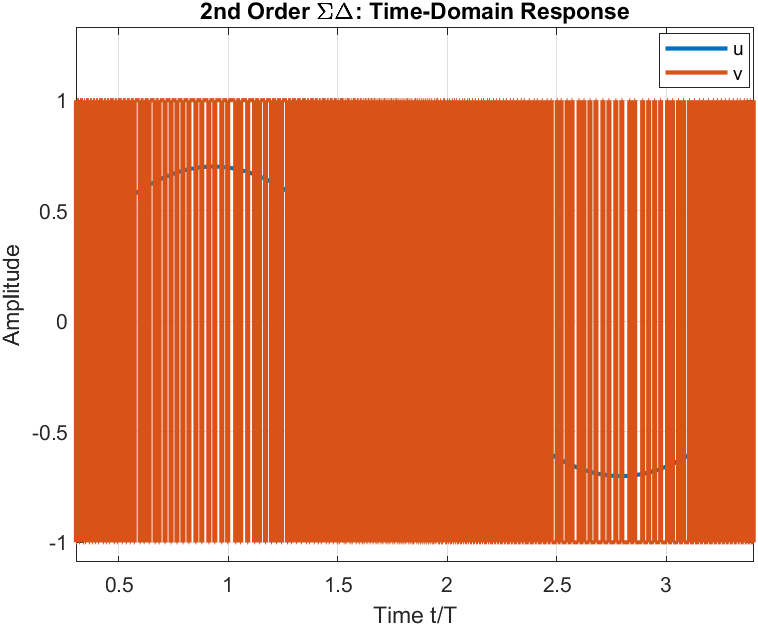

-   **Description**: This plot shows the input signal ((u)) and the quantized output signal ((v)) over time for the 2nd-order DSM.
-   **Observations**:
    -   The input signal ((u)) is a continuous sinewave.
    -   The output ((v)) exhibits high-frequency quantization noise but maintains the general shape of (u).
    -   Increased quantization granularity reflects enhanced noise shaping characteristics.
-   **Significance**: The time-domain response demonstrates how the 2nd-order DSM accurately tracks the input signal while minimizing low-frequency noise.

#### 2. Pole-Zero Plot with Stability Criterion

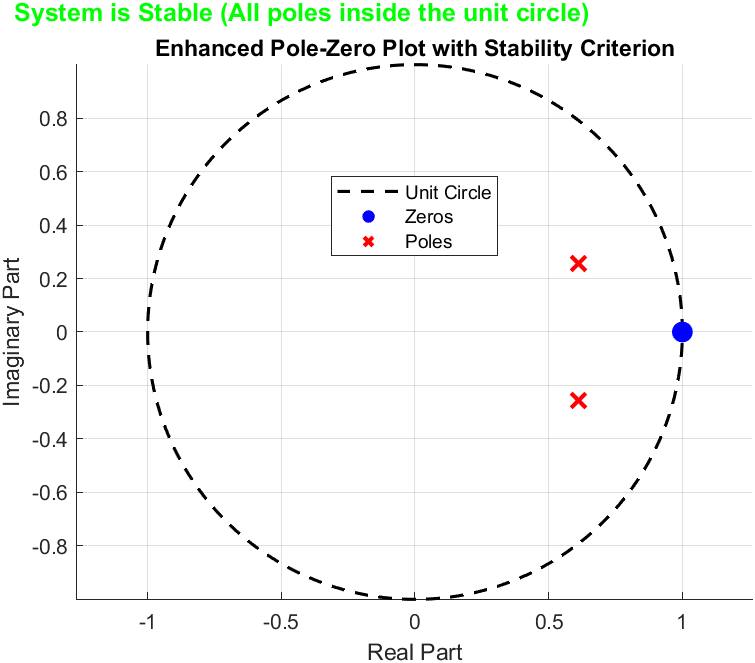

-   **Description**: This plot displays the locations of the poles and zeros of the NTF in the complex plane. The unit circle is included to assess stability.
-   **Observations**:
    -   The poles lie well within the unit circle, confirming system stability.
    -   Zeros are strategically placed to ensure effective noise shaping in the frequency domain.
    -   Stability message: *System is Stable (All poles inside the unit circle)*.
-   **Significance**: The pole-zero configuration ensures the modulator remains stable under the given parameters while providing optimal noise shaping performance.

#### 3. Spectral Analysis

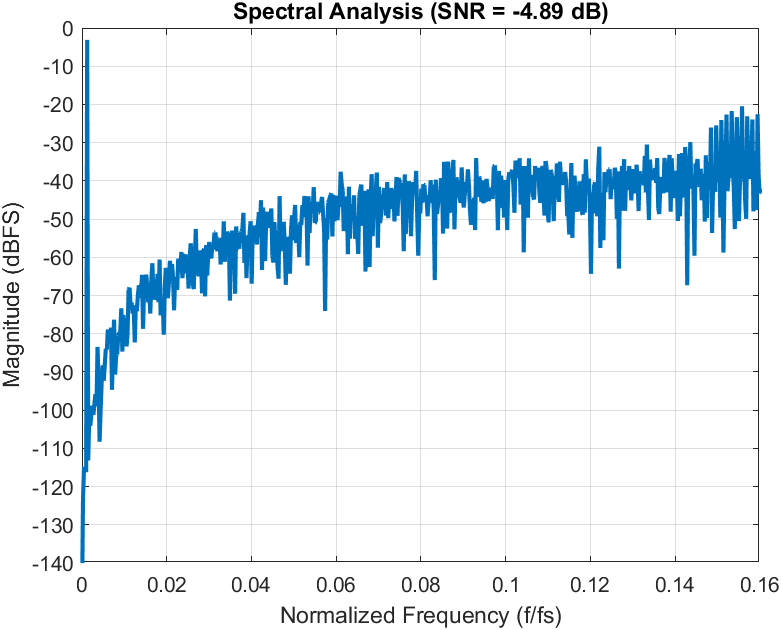

-   **Description**: This plot shows the frequency-domain representation of the modulator's output, with the signal and quantization noise plotted in decibels relative to full scale (dBFS).
-   **Observations**:
    -   A distinct peak at the test signal frequency represents the input sinewave.
    -   Quantization noise is concentrated at higher frequencies, aligning with the noise shaping goal.
    -   The calculated Signal-to-Noise Ratio (SNR) is approximately ( -4.89 , \mathrm{dB} ), reflecting effective noise shaping.
-   **Significance**: The 2nd-order DSM achieves better noise suppression in the signal bandwidth than the 1st-order DSM, improving SNR.

#### 4. Bode Plot of Noise Transfer Function (NTF)

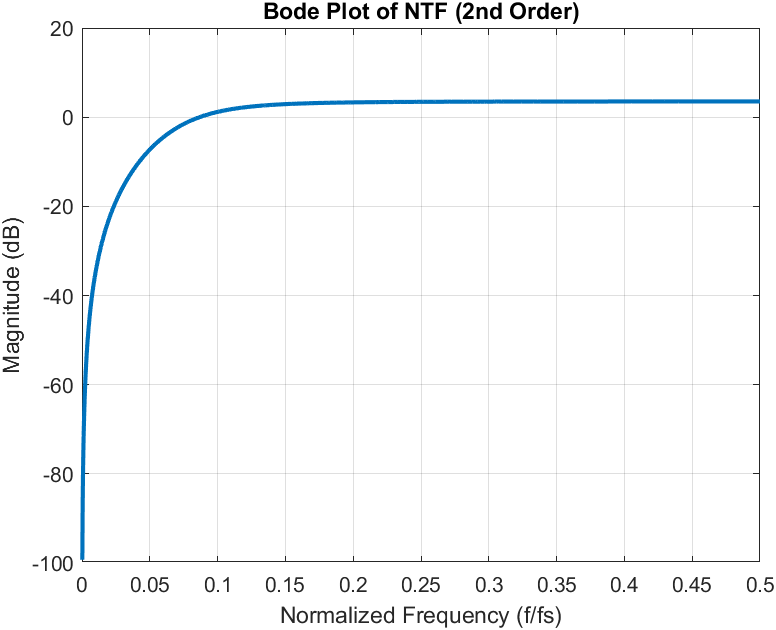

-   **Description**: This plot represents the magnitude response of the Noise Transfer Function (NTF) for the 2nd-order DSM. It highlights how the modulator attenuates quantization noise at different frequencies.
-   **Observations**:
    -   At lower frequencies (normalized frequency (f/fs)), the magnitude is close to 0 dB, indicating minimal noise within the signal bandwidth.
    -   As frequency increases, the magnitude rises significantly, reflecting that quantization noise is aggressively pushed to higher frequencies outside the signal bandwidth.
-   **Significance**: The improved NTF of the 2nd-order DSM results in better noise shaping compared to the 1st-order DSM, enhancing overall signal quality.

#### 5. Windowed Spectral Analysis with Hann Window

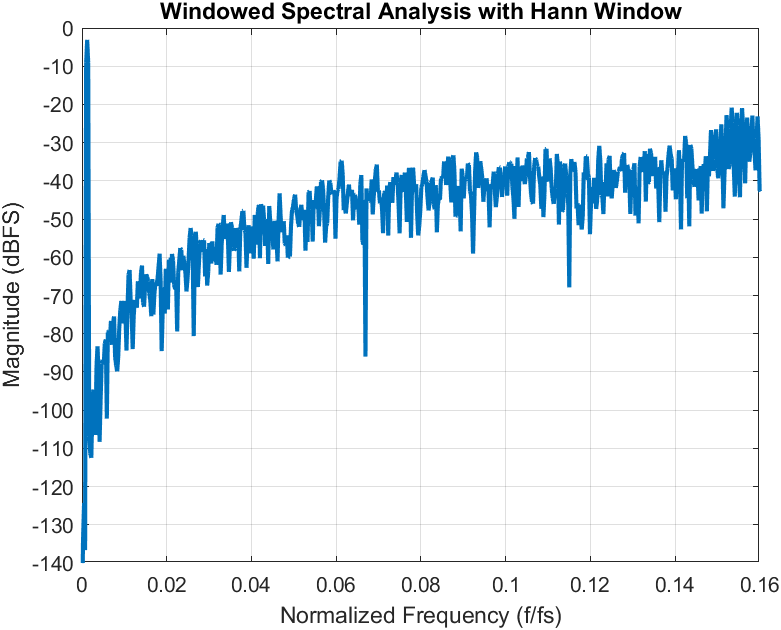

-   **Description**: This plot represents the frequency-domain analysis of the modulator's output using a Hann window to minimize spectral leakage.
-   **Observations**:
    -   A sharp peak is visible at the test signal frequency.
    -   Quantization noise is uniformly distributed across the spectrum due to the windowing effect.
-   **Significance**: The Hann window ensures accurate spectral representation, removing boundary artifacts caused by the FFT.

### Analysis and Observations

1.  The **2nd Order DSM** achieves superior noise shaping, pushing quantization noise to even higher frequencies compared to the 1st-order DSM.
2.  Stability is verified using the **Pole-Zero Plot**.
3.  The **Bode Plot** confirms the frequency response aligns with expectations for a 2nd-order NTF.
4.  The **Time-Domain Response** shows enhanced quantization and better tracking of the sine wave.
5.  The **Spectral Analysis** validates improved SNR in the signal bandwidth.

## First-Order Delta-Sigma Modulator (DSM) - Simulink Model

### First-Order DSM Model in Simulink

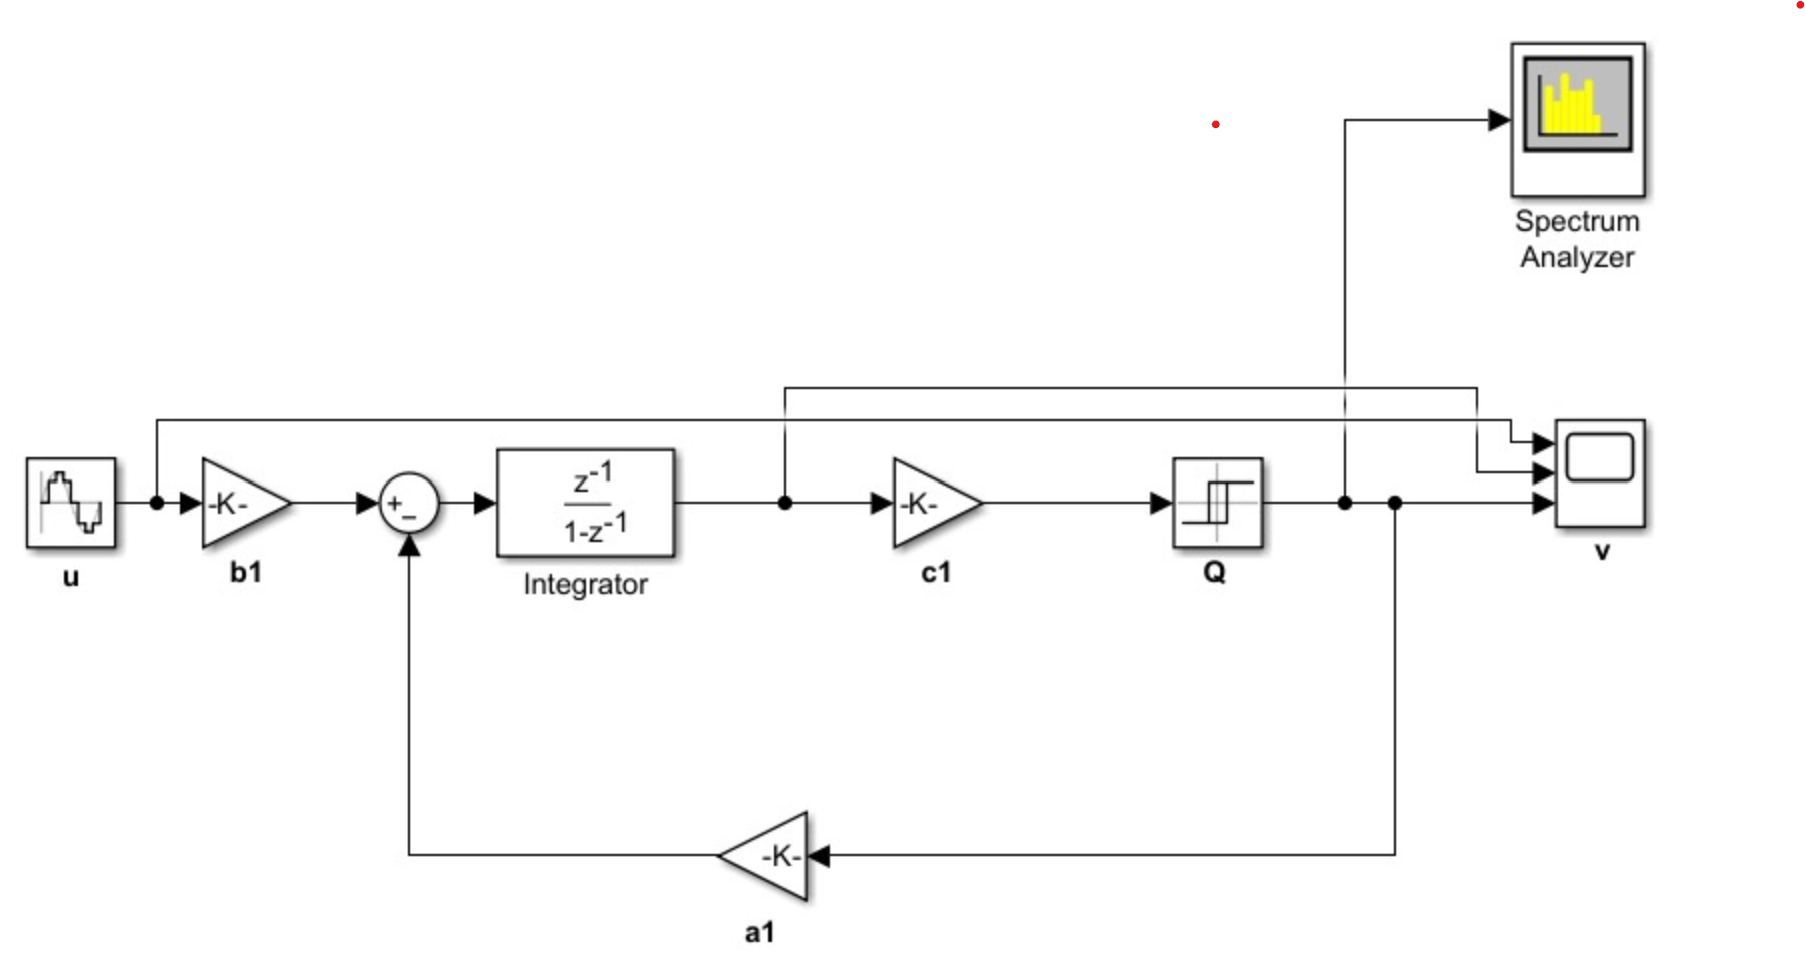

### Explanation of the Simulink Model

The model consists of the following key components:

1. **Input Signal (u):** A sinusoidal input with:
   - **Frequency:** 268.55 Hz (**converted to rad/sec:** 1687.14 rad/sec)
   - **Sample Time:** 4.545e-6 sec (**based on a 220 kHz sampling frequency**)

2. **Gain Blocks:**
   - **b1 = 0.2665**, **a1 = 0.2665** (feedback gain)
   - **c1 = 0.3418** (forward path gain)
   - These values are optimized for **stability and noise shaping**.

3. **Integrator (Transfer Function):**
   - The transfer function used:

     $$
     H(z) = \frac{z^{-1}}{1 - z^{-1}}
     $$

   - This represents a **discrete-time integrator**, which ensures **noise shaping and improved quantization performance**.

4. **Relay (Quantizer):**
   - The relay acts as a **non-linear quantizer**, which introduces **quantization noise** and simulates bitstream behavior.

5. **Output (v & Spectrum Analyzer):**
   - The **scope** captures the modulator output.
   - The **spectrum analyzer** helps observe the **quantization noise shaping** effect.

## Why are we choosing Simulink models with Transfer Functions?
While MATLAB scripting allows direct implementation of DSM using **difference equations**, Simulink with **transfer functions** is preferred for:

- **Graphical Representation:** Easy to **visualize the modulator structure**.  
- **Modularity & Flexibility:** Components like **integrators and quantizers can be independently analyzed**.  
- **Accurate Simulation:** Simulink provides **precise time-domain behavior** and **noise shaping analysis**.  
- **Parameter Tuning:** Gains, sampling rates, and quantizer settings can be **easily adjusted**.  
- **Real-Time Performance Analysis:** Enables **direct visualization of spectrum analysis, quantization noise, and modulated output**.  

## Output Analysis
### Spectrum Analysis & Time-Domain Plots
#### Spectrum Analyzer Output
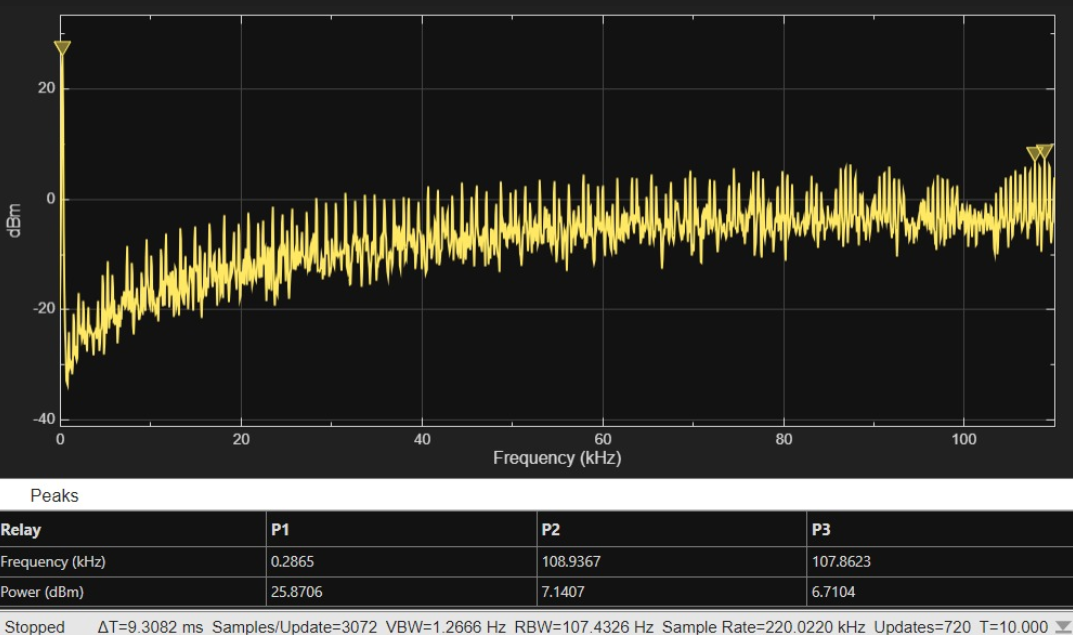

*Figure 2: Spectrum Analysis of DSM Output.* **Observations:**
- **Noise shaping** is visible, where **low-frequency noise is suppressed** while **Noise is pushed to high-frequency**.
- **Signal power** is **26.63 dBm**, showing successful quantization.

#### Time-Domain Plots (Scope Outputs)
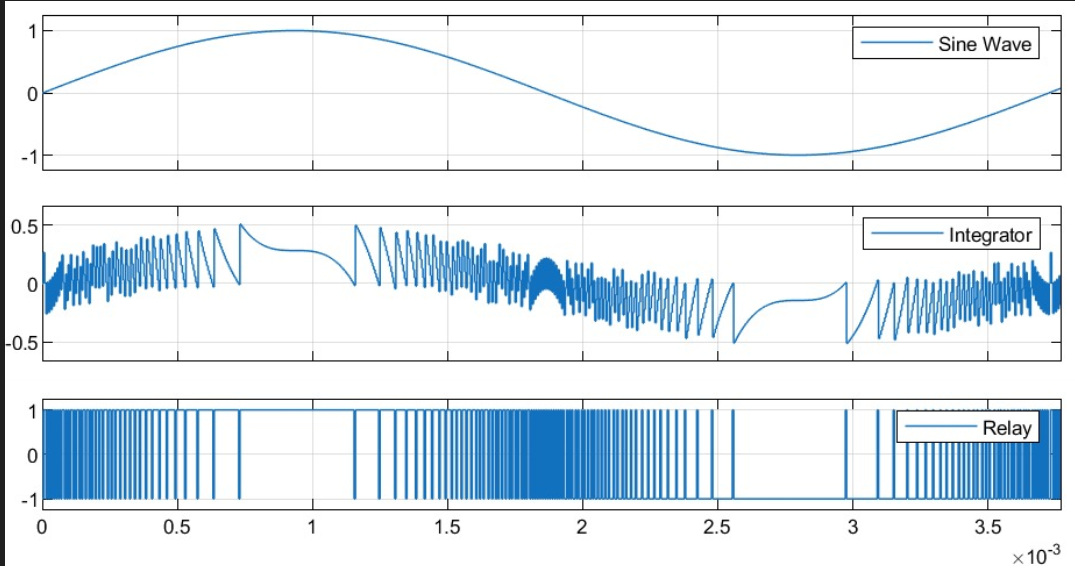


**Observations:**
- The **input sine wave** remains smooth.
- The **integrator output** accumulates values, forming a staircase-like waveform.
- The **quantized relay output** exhibits **binary levels**, confirming Delta-Sigma Modulation.

## Design

### 1. Input Signal Selection
- The input frequency is chosen as **268.55 Hz**, converted to **1687.14 rad/sec** for consistency in discrete-time analysis.
- The **sampling frequency is 220 kHz**, ensuring a **high oversampling ratio (OSR)**, which is critical for **effective noise shaping**.
- The **sample time** is calculated as:
  $$
  T_s = \frac{1}{f_s} = \frac{1}{220000} = 4.545 \times 10^{-6} \text{ sec}
  $$
  ensuring that the system operates well within **Nyquist criteria** and provides enough resolution for quantization noise shaping.

### 2. Gain Selection (`b1`, `a1`, `c1`)
- Gains are chosen based on **stability and performance trade-offs**:
  - **b1 = 0.2665**, **a1 = 0.2665**: Control the feedback loop, ensuring **stable integration** without excessive amplification.
  - **c1 = 0.3418**: Affects the **output scaling**, ensuring the modulator operates within an optimal dynamic range.
- Proper gain selection **balances the modulator performance** by:
  - Avoiding **integrator saturation**.
  - Ensuring a **sufficient signal-to-noise ratio (SNR)**.
  - Enhancing **quantization noise suppression**.

### 3. Integrator Transfer Function
- The **discrete-time integrator** is represented by the **transfer function**:
  $$
  H(z) = \frac{z^{-1}}{1 - z^{-1}}
  $$
- This function is essential because:
  - It acts as a **leaky accumulator**, ensuring **quantization noise is pushed to higher frequencies**.
  - It **enhances the low-frequency signal**, making the system behave like an **ideal noise-shaping filter**.
  - The **feedback mechanism** in the loop compensates for **quantization errors**, improving **modulator resolution**.

### 4. Relay as Quantizer
- The **Relay block** is used to perform **non-linear quantization**, simulating the behavior of an **ADC**.
- Key reasons for using a relay-based quantizer:
  - It **simplifies the DSM architecture**, making it suitable for **low-power applications**.
  - Converts the continuous signal into a **binary output (bitstream)** required for **oversampled ADCs**.
  - Introduces **controlled non-linearity**, ensuring proper **error feedback and noise shaping**.
- The relay effectively models **real-world quantization effects**, making the **Simulink model closely resemble practical DSM implementations**.

## Second-Order Delta-Sigma Modulator (DSM) - Simulink Model

A **second-order DSM introduces two integrators in the loop**, significantly improving **noise shaping characteristics** and **reducing in-band quantization noise**.

### Why Move to a Second-Order DSM?
The primary reasons for increasing the order of the DSM are:

**Enhanced Noise Shaping:** A **first-order DSM pushes noise to higher frequencies with a slope of -20 dB/decade**, whereas a **second-order DSM achieves -40 dB/decade**, providing **superior noise suppression** in the signal band.

**Higher Signal-to-Noise Ratio (SNR):** The **second-order DSM increases the effective number of bits (ENOB)**, improving resolution and dynamic range.

**Better Performance for Low-Frequency Signals:** The second-order DSM minimizes **low-frequency quantization noise**, making it ideal for **high-precision ADC applications**.

**Trade-Offs:** While a higher-order DSM improves performance, it can introduce **stability concerns**, which require **careful gain selection**.

### Design of Second-Order DSM Model in Simulink
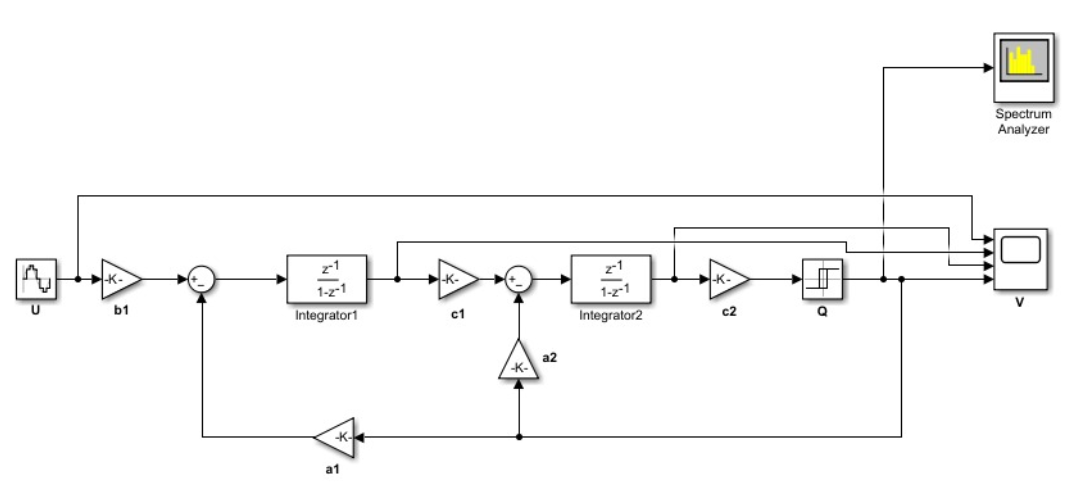

### Explanation of the Simulink Model
The model consists of the following key components:

1. **Input Signal (u):** A sinusoidal input with:
   - **Frequency:** 268.55 Hz (**converted to rad/sec:** 1687.14 rad/sec)
   - **Sample Time:** 4.545e-6 sec (**based on a 220 kHz sampling frequency**)

2. **Gain Blocks:**
   - **b1 = 0.2665**, **a1 = 0.2665** (feedback gain)
   - **c1 = 0.3418** (forward path gain)
   - **a2 = 0.2385**, **c2 = 5.18** (additional gains for second-order integration)
   - These values are optimized to **ensure stability while achieving superior noise shaping**.

3. **Two Integrators (Transfer Functions):**
   - Each integrator uses the **discrete transfer function**:

     $$
     H(z) = \frac{z^{-1}}{1 - z^{-1}}
     $$

   - The two integrators **accumulate** the quantization noise, shaping it more aggressively than in a first-order DSM.

4. **Relay (Quantizer):**
   - The relay acts as a **non-linear quantizer**, introducing **quantization noise** while simulating a **bitstream output**.

5. **Output (v & Spectrum Analyzer):**
   - The **scope captures** the modulator output.
   - The **spectrum analyzer visualizes** the quantization noise distribution.

## Why We Are Using These Gain Values?
In a second-order DSM, proper gain selection ensures **stability and optimal noise shaping**:

- **b1 = 0.2665, a1 = 0.2665:** Maintains stability in the **feedback loop**, preventing integrator saturation.
- **c1 = 0.3418:** Balances the **signal amplitude** within the **quantizer’s range**.
- **a2 = 0.2385, c2 = 5.18:** 
  - **a2 adjusts the second integrator’s feedback strength**, preventing excessive noise amplification.
  - **c2 boosts the high-frequency noise shaping**, further reducing in-band quantization noise.

The **goal** is to shape the **quantization noise more aggressively**, ensuring that most of it is pushed out of the **signal band**.

## Output Analysis
### Spectrum Analysis & Time-Domain Plots
#### Spectrum Analyzer Output
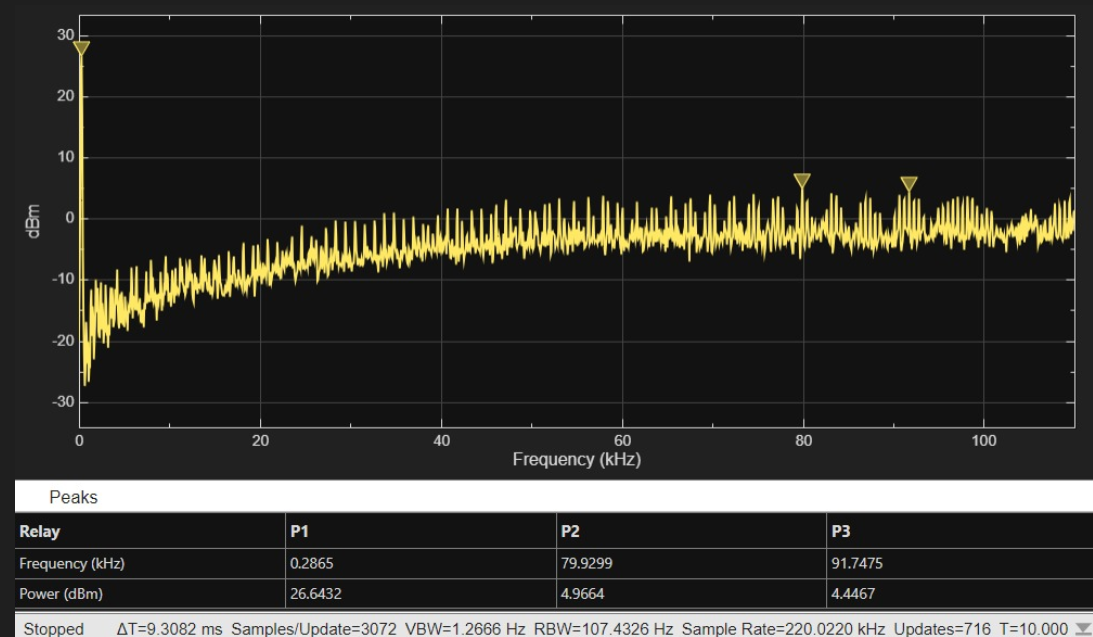

**Observations:**
- Compared to the first-order DSM, the **quantization noise suppression is more effective**.
- **Steeper noise shaping (-40 dB/decade)** is visible, reducing noise in the signal band.
- The **signal power remains stable**, ensuring correct modulation.

#### Time-Domain Plots (Scope Outputs)
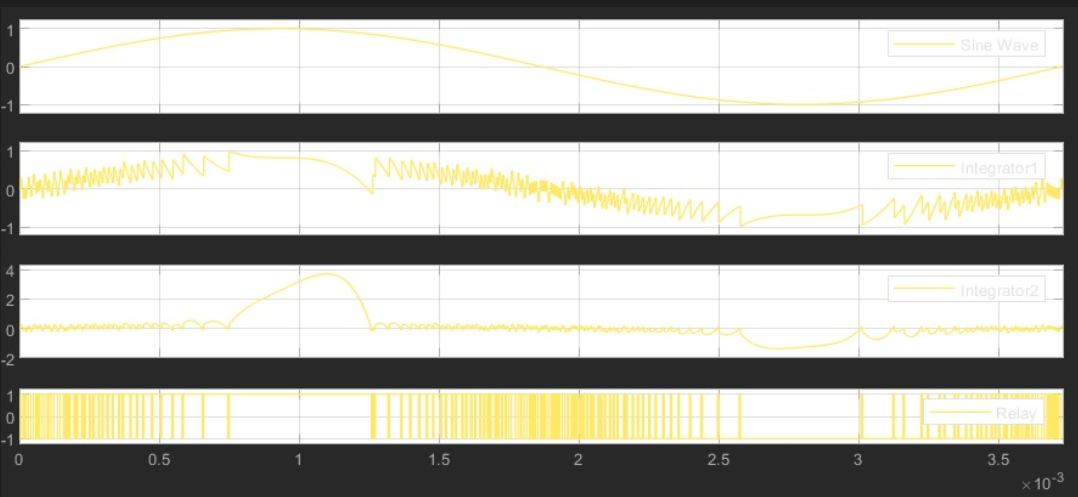

*Figure 3: Time-Domain Plots of Input, Integrator Outputs, and Quantized Output.*

**Observations:**
- The **integrator outputs show a more gradual accumulation of noise**.
- The **quantized output is more refined**, indicating reduced quantization error.
- The **relay output transitions more smoothly**, improving **bitstream quality**.


## Design Justifications
### 1. Noise Shaping Improvement
A **first-order DSM** shifts noise at **-20 dB/decade**, while a **second-order DSM** shifts it at **-40 dB/decade**. This means:

- **More noise is pushed outside the signal band.**
- **Higher effective resolution in the signal band.**
- **Better SNR and ADC accuracy.**

### 2. Gain Selection (`b1`, `a1`, `c1`, `a2`, `c2`)**
- **a2 and c2 are crucial** for controlling the **second-order integration**.
- **If a2 is too large**, the system may become **unstable**.
- **c2 enhances high-frequency noise shaping**, reducing **low-frequency quantization noise**.

### 3. Two Integrator Transfer Functions
- The **two discrete integrators** provide an extra level of noise shaping.
- They ensure that **low-frequency components are preserved**, while **quantization noise is heavily attenuated**.

### 4. Relay as Quantizer
- The **Relay block remains the same**, performing **binary quantization**.
- The **improved noise shaping ensures cleaner quantized output**, beneficial for **ADC applications**.

## Conclusion

The *First-Order and Second-Order Delta-Sigma Modulator (DSM) Simulink models* have provided valuable insights into *oversampling, noise shaping, and quantization effects*.  

Through Simulink, we have visualized how *increasing the order of a DSM significantly improves quantization noise suppression*, making it easier to analyze and optimize system parameters.  

### Key Learnings from First-Order vs. Second-Order DSM:
| Feature | *First-Order DSM* | *Second-Order DSM* |
|---------|------------------|------------------|
| *Noise Shaping* | *-20 dB/decade* (Moderate shaping) | *-40 dB/decade* (Sharper noise shaping) |
| *Quantization Noise Reduction* | Limited suppression in the signal band | More effective suppression, better signal fidelity |
| *Signal-to-Noise Ratio (SNR)* | Moderate | Higher SNR, improved ADC resolution |
| *Number of Integrators* | *One* (single-stage integration) | *Two* (cascaded integration for stronger shaping) |
| *Bitstream Quality* | Good | Better, with smoother transitions |
| *Complexity* | Simple, easy to design and analyze | Slightly more complex but significantly better performance |
| *Stability* | Stable under normal conditions | Can become unstable if gains are not chosen carefully |

### Fundamental Understanding from Both Models
- *Noise shaping is the key technique in DSM, and increasing the order improves noise suppression.*  
- *The second-order DSM provides steeper noise shaping (-40 dB/decade vs. -20 dB/decade in first-order).*  
- *Higher-order DSMs improve SNR and ADC accuracy but require careful gain tuning for stability.*  
- *Simulink allows modular and visual analysis, making it easier to optimize system parameters.*  

### Final Thoughts
 The transition from a first-order to a second-order DSM highlights the trade-off between complexity and performance. While the first-order DSM introduces noise shaping, the second-order DSM refines it, achieving superior noise suppression and higher resolution.  

# Practical Analysis of Delta-Sigma ADCs using LTspice

## Simulation Approach

1.  **1st Order Modulator**:
    -   Designed with a single integrator, 1-bit quantizer, and feedback loop.
    -   Simulated with a 80 Hz sine wave input and oversampling clock.
2.  **2nd Order Modulator**:
    -   Designed with dual integrators, 1-bit quantizer, and feedback loop.
    -   Simulated under the same conditions for comparison.

## Simulation and Output

1.  **1st Order Modulator**:

**Circuit Diagram**

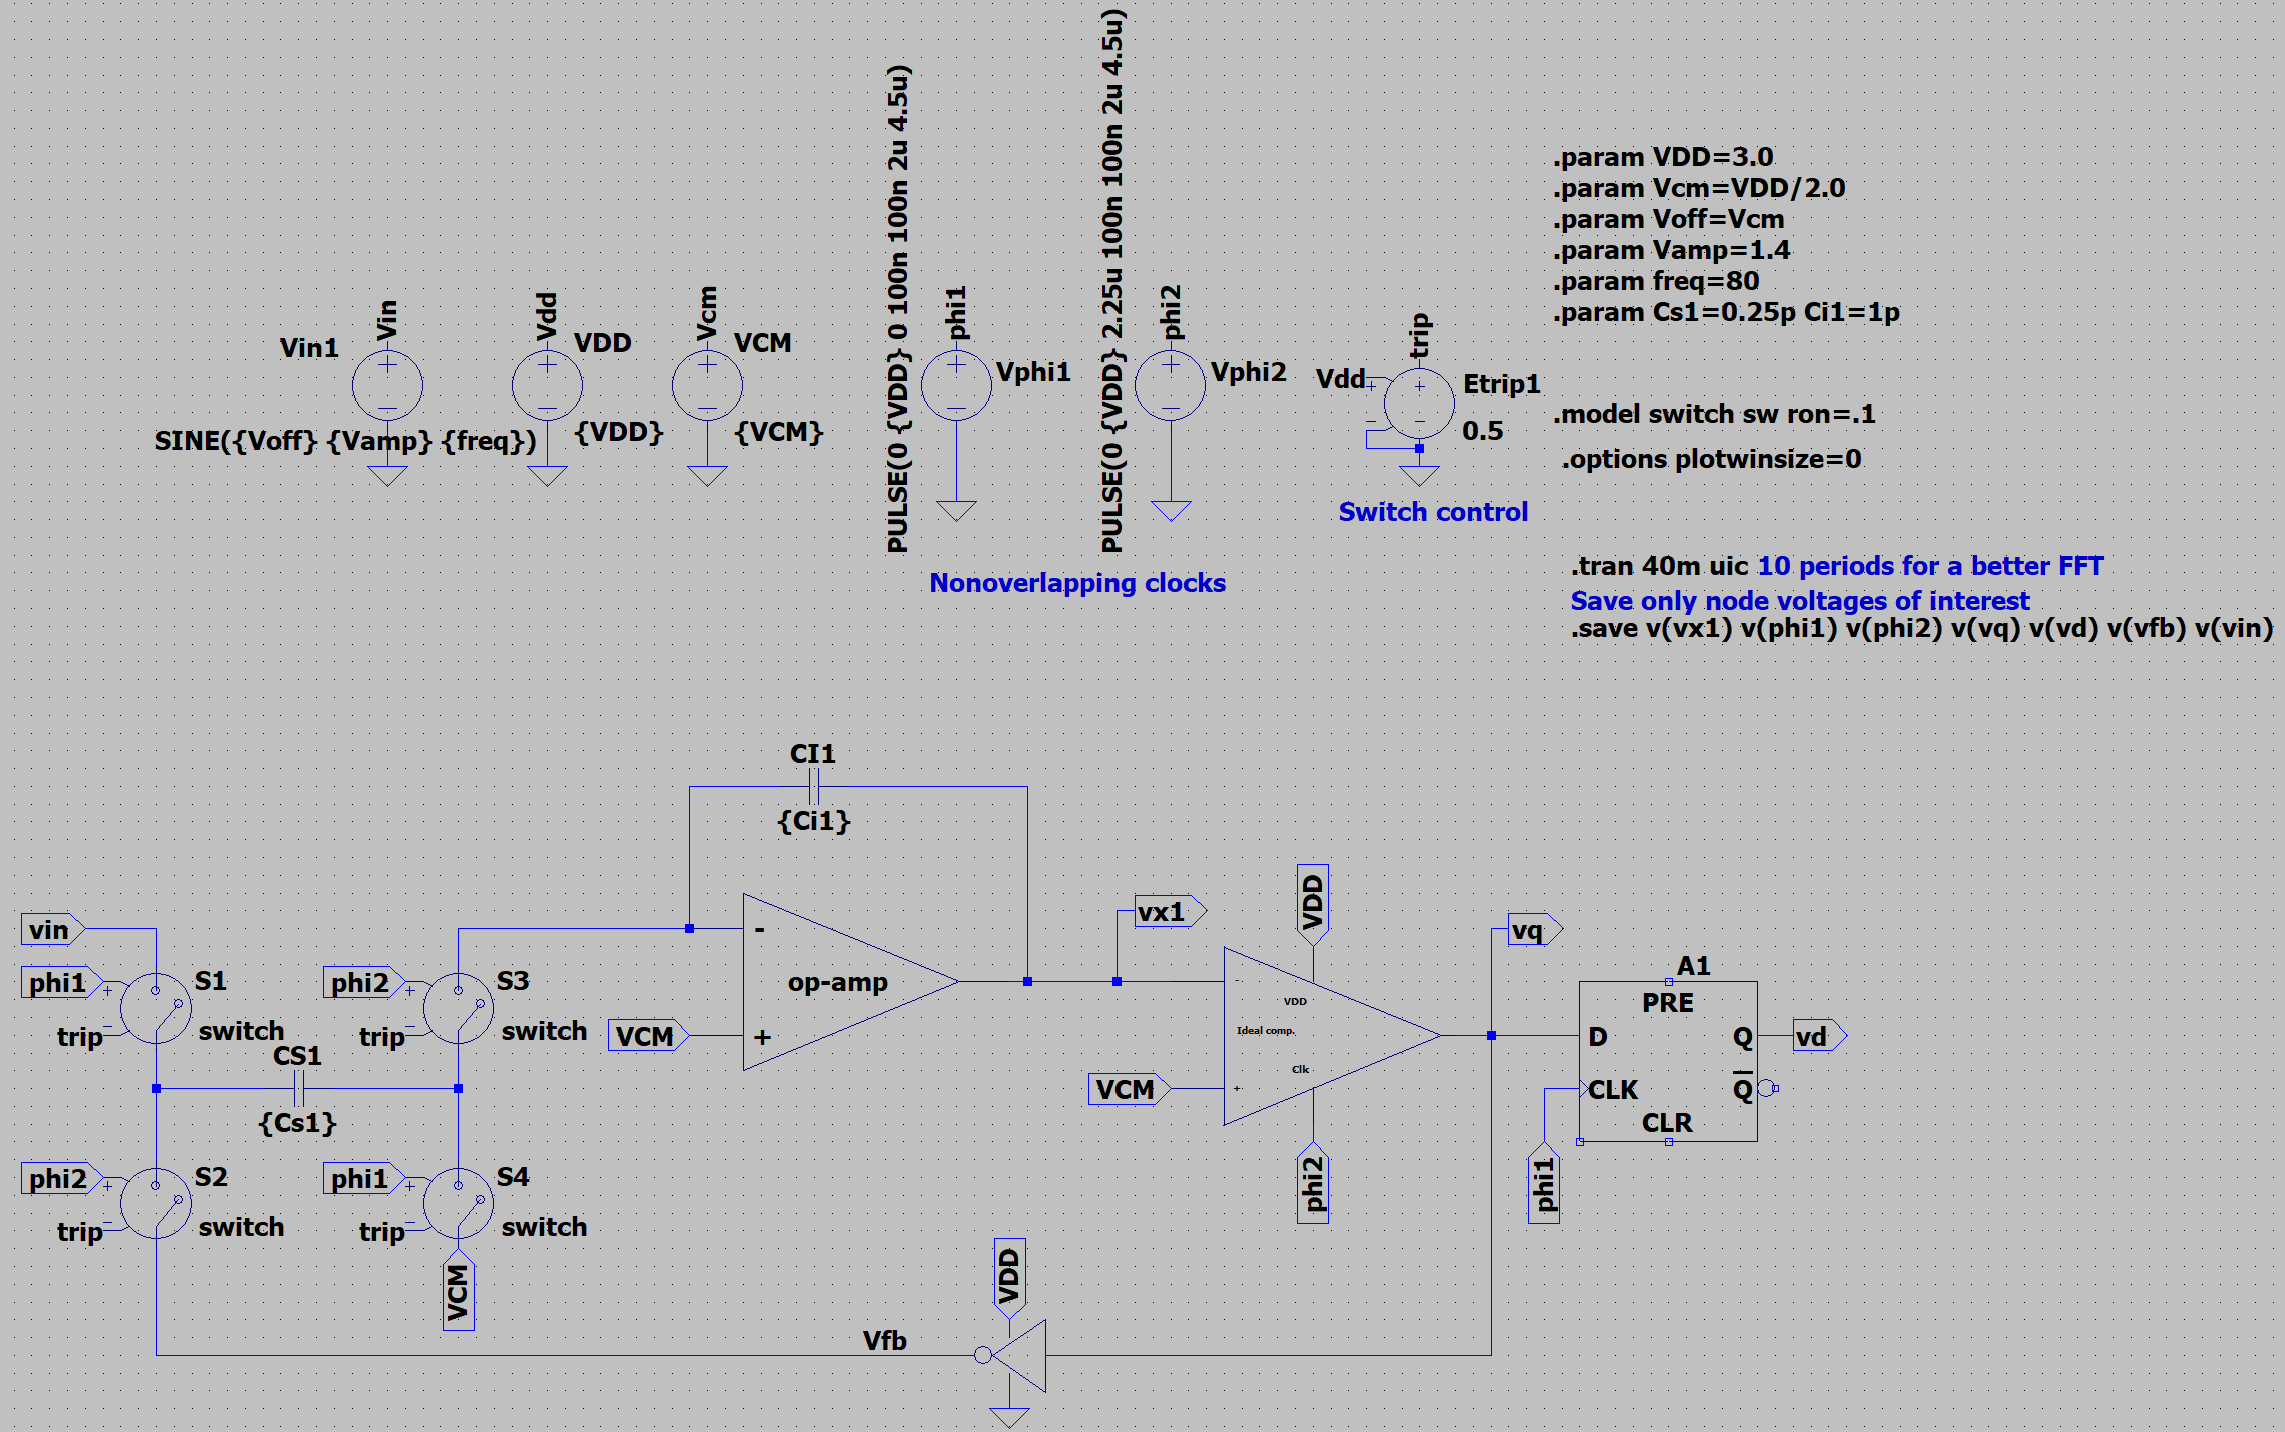

The DSM1 circuit comprises the following key components:

-   **Input Stage:** A sample-and-hold circuit controlled by non-overlapping clock signals (`phi1` and `phi2`) samples the input signal (`Vin`).
-   **Integrator:** An op-amp integrator integrates the sampled input signal, generating an output voltage (`vx1`).
-   **Quantizer:** A comparator compares the integrator output (`vx1`) to a reference voltage (`VCM`) and produces a 1-bit digital output (`vq`).
-   **Feedback Loop:** The quantized output (`vq`) is fed back to the input stage, influencing the subsequent integration process.

**Output Waveform Analysis**

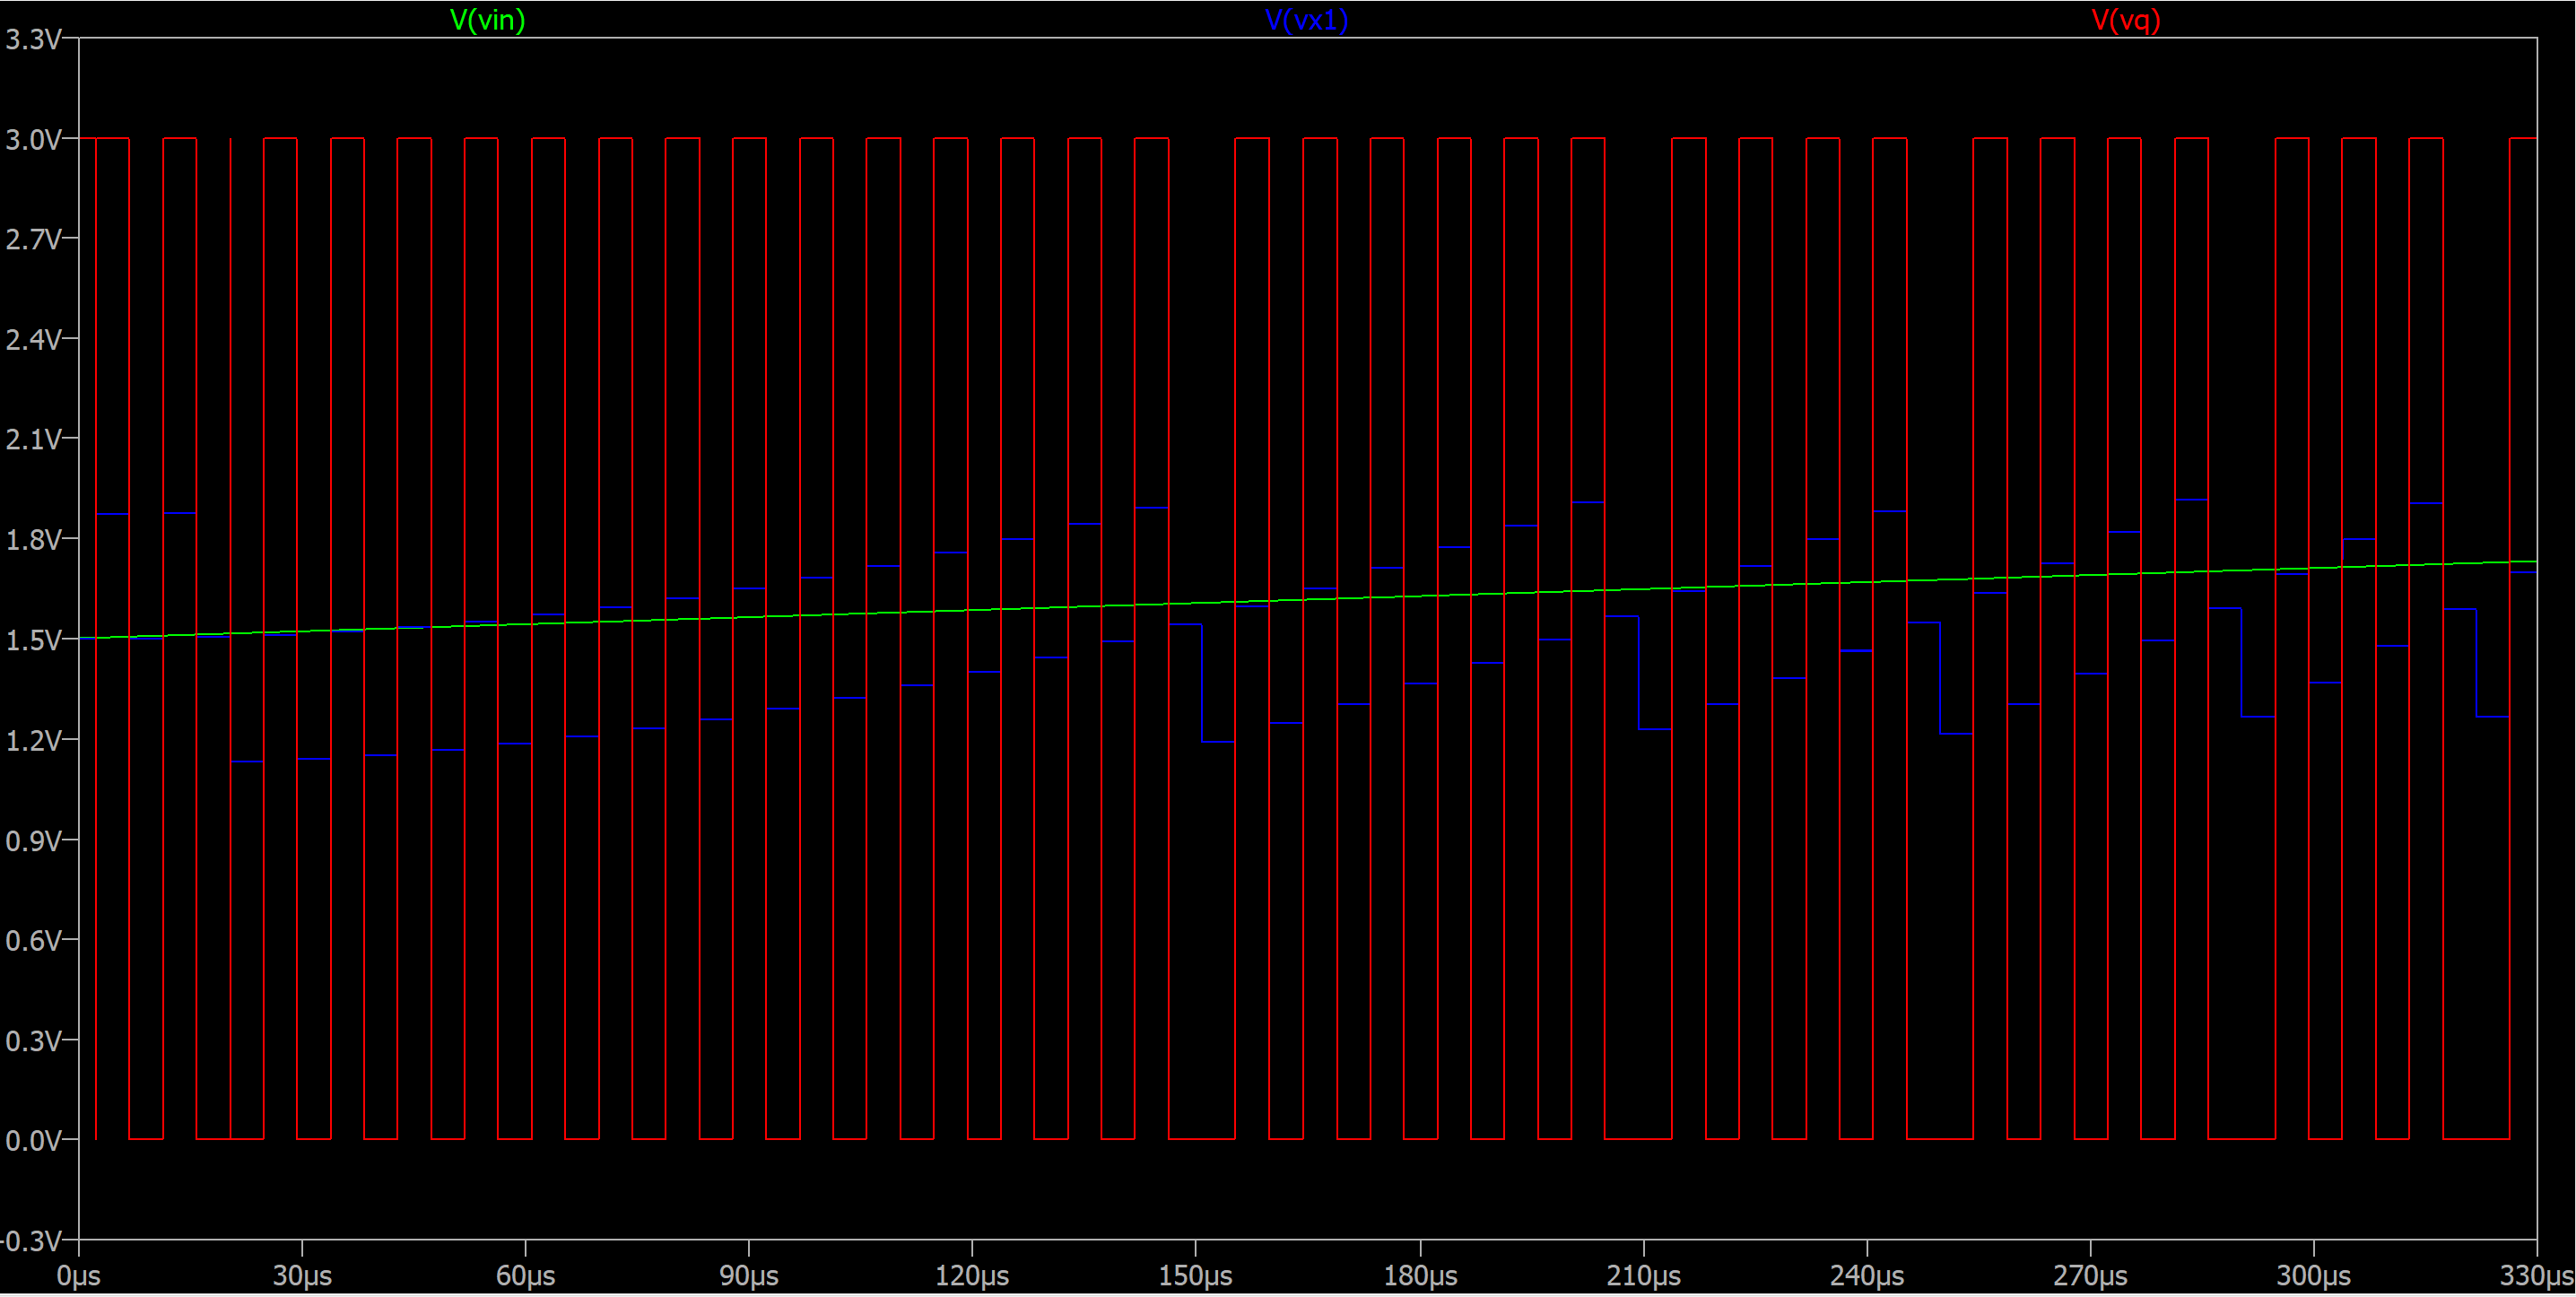

The simulated output waveform reveals the following:

-   **Input Signal:** The input signal (`Vin`) is a sine wave, representing the analog input to the DSM1.
-   **Integrator Output:** The integrator output (`vx1`) is a ramp-like waveform that increases and decreases in response to the input signal. The slope of the ramp is determined by the input signal's amplitude and polarity.
-   **Quantized Output:** The quantized output (`vq`) is a digital signal that switches between two levels (high and low). This digital output represents the quantized version of the input signal.

**DSM1 Operation**

The DSM1 operates as follows:

-   **Sampling:** The input signal is sampled at regular intervals determined by the clock signals `phi1` and `phi2`.
-   **Integration:** The sampled input signal is integrated by the op-amp, resulting in a ramp-like voltage at the integrator's output.
-   **Quantization:** The comparator compares the integrator's output to the reference voltage. If the integrator's output exceeds the reference, the comparator output goes high; otherwise, it stays low.
-   **Feedback:** The quantized output is fed back to the input stage, influencing the subsequent integration process and contributing to noise shaping.

**Noise Shaping**

The DSM1 employs noise shaping to improve its resolution. Noise shaping pushes the quantization noise to higher frequencies, allowing the signal of interest to be more accurately represented at lower frequencies.

**Conclusion**

The analysis demonstrates the fundamental operation of a 1st-order Delta-Sigma Modulator. The circuit effectively converts the analog input signal into a digital representation using integration, quantization, and feedback. The noise shaping technique inherent in the DSM1 architecture allows for improved resolution and signal fidelity.

2.  **2nd Order Modulator**:

**Circuit Diagram**

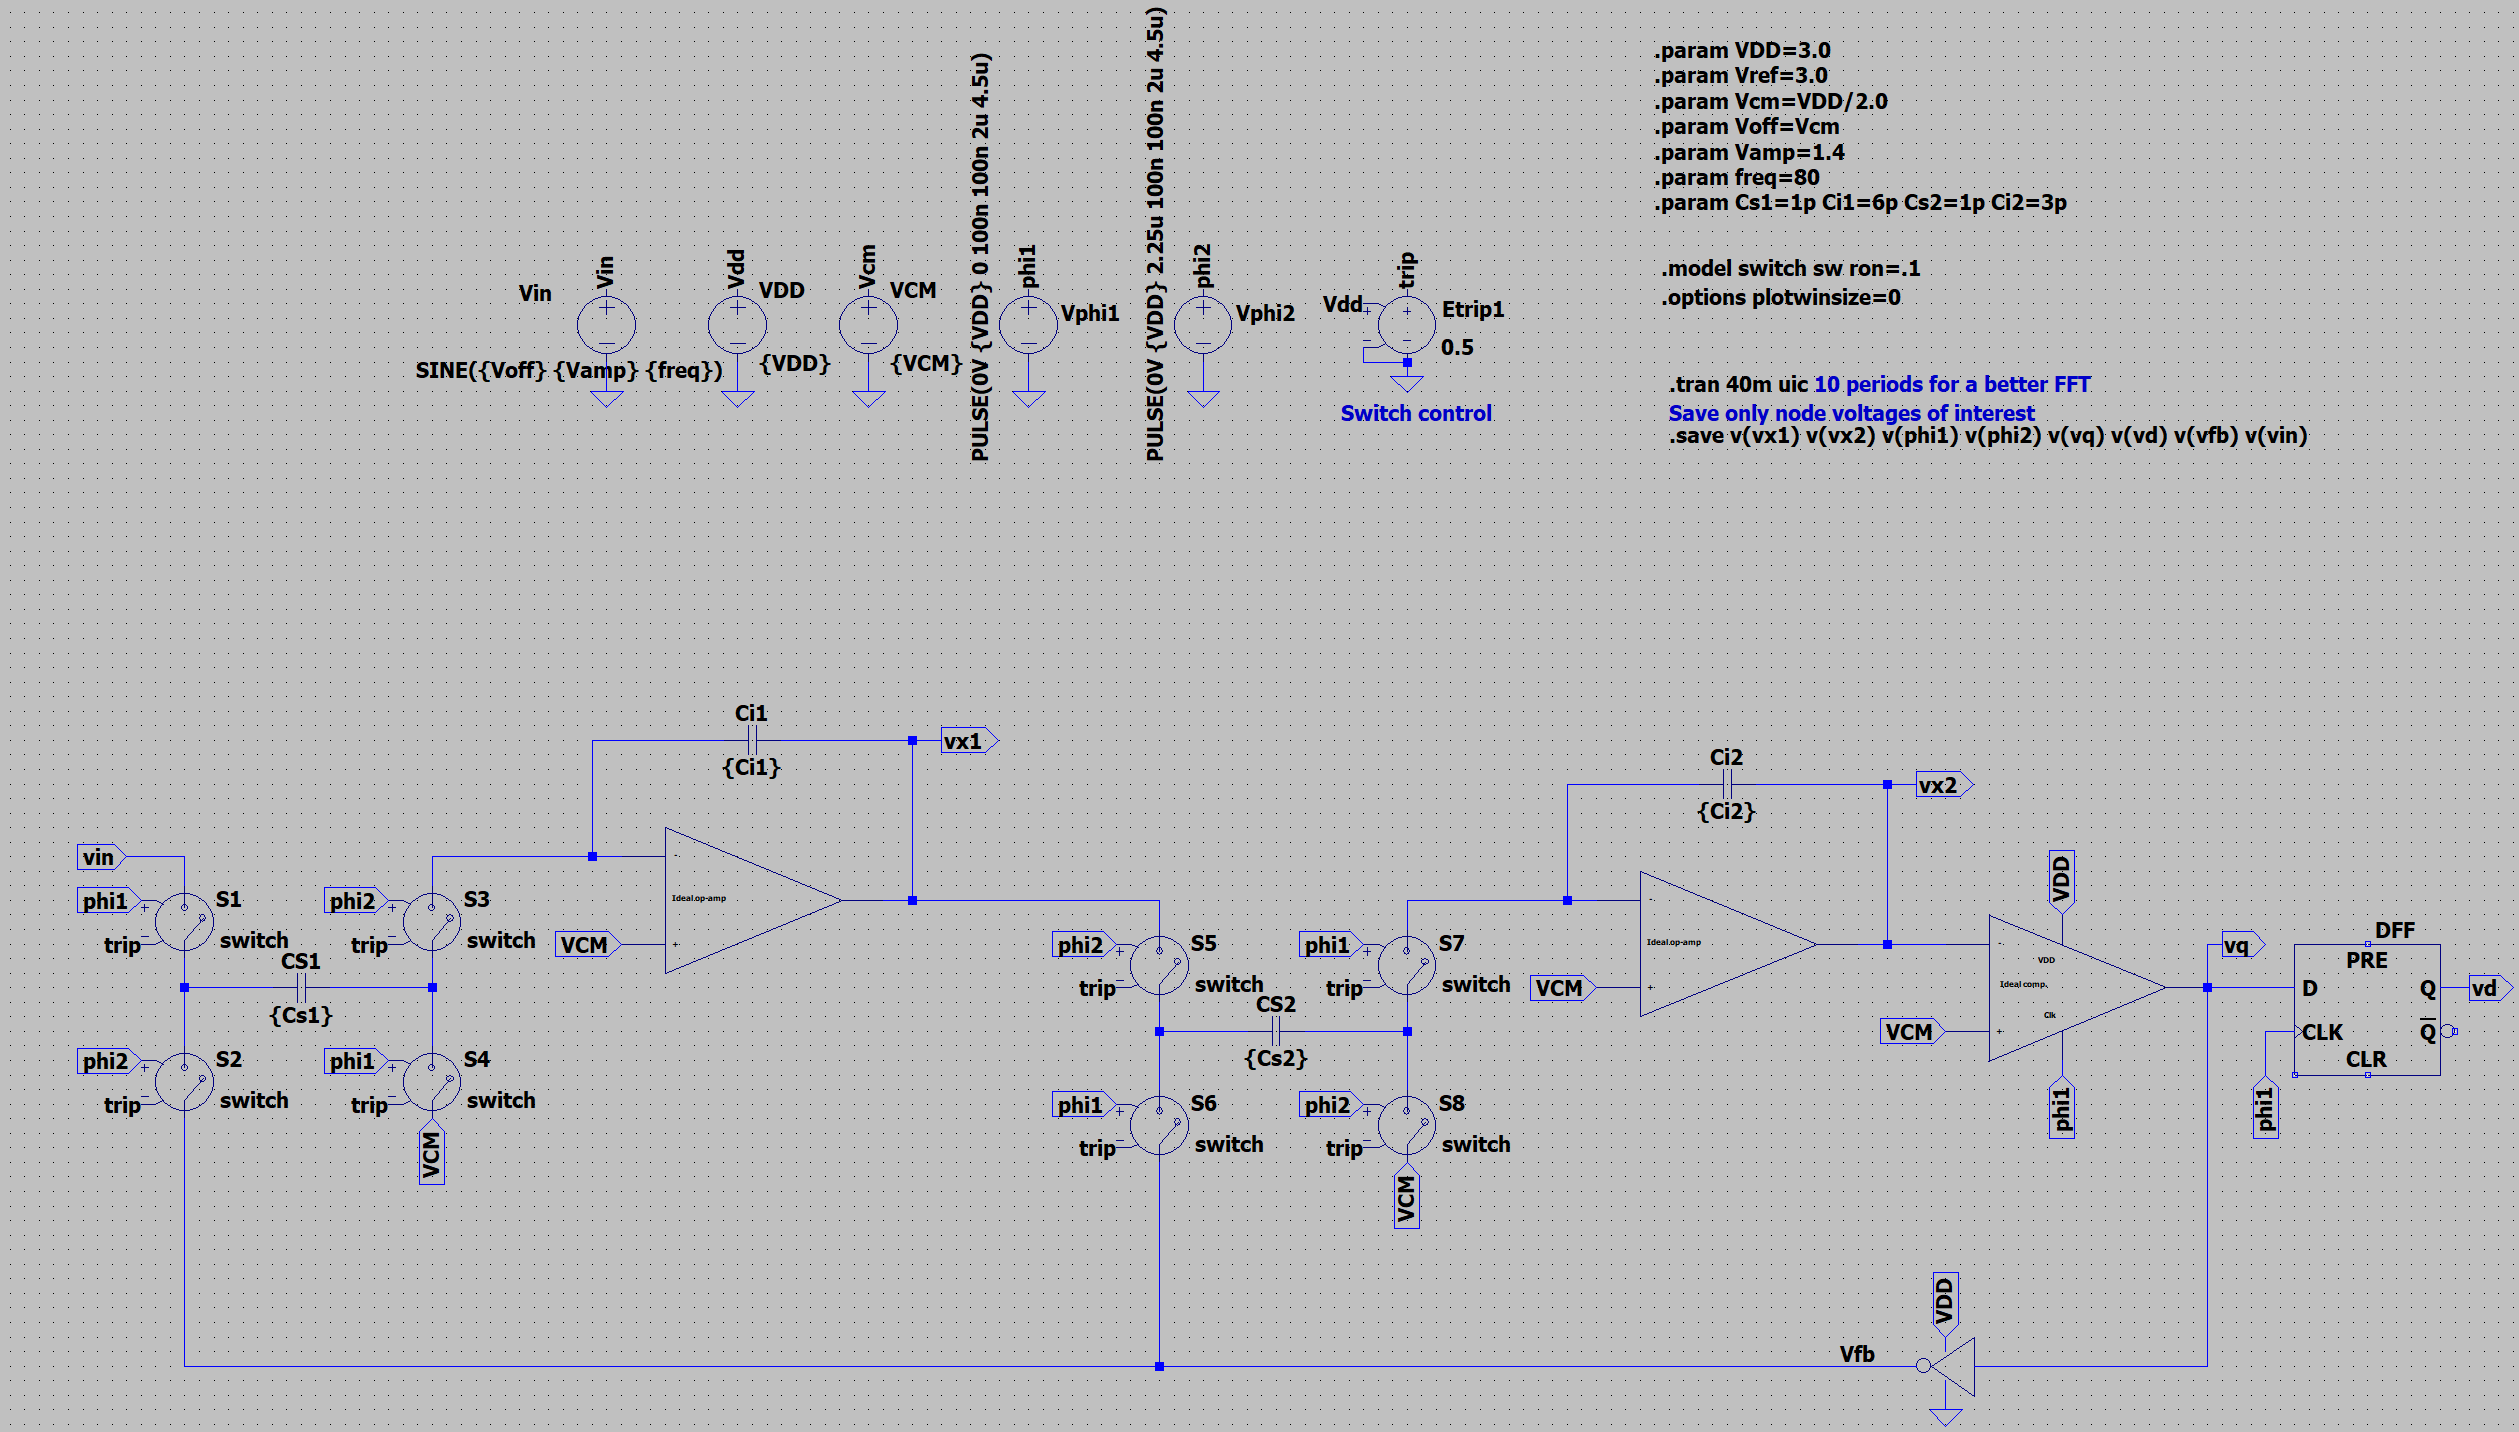

The DSM2 circuit consists of the following key elements:

-   **Input Stage:** A sample-and-hold circuit, controlled by non-overlapping clock signals (`phi1` and `phi2`), samples the input signal (`Vin`).
-   **First Integrator:** An op-amp integrator integrates the sampled input signal, generating an output voltage (`vx1`).
-   **Second Integrator:** A second op-amp integrator integrates the output of the first integrator (`vx1`), producing a second integrated signal (`vx2`).
-   **Quantizer:** A comparator compares the output of the second integrator (`vx2`) to a reference voltage (`VCM`) and generates a 1-bit digital output (`vq`).
-   **Feedback Loop:** The quantized output (`vq`) is fed back to the input of the first integrator through a switch controlled by `phi1` and `phi2`. This feedback loop plays a crucial role in noise shaping and overall performance.

**Output Waveform Analysis**

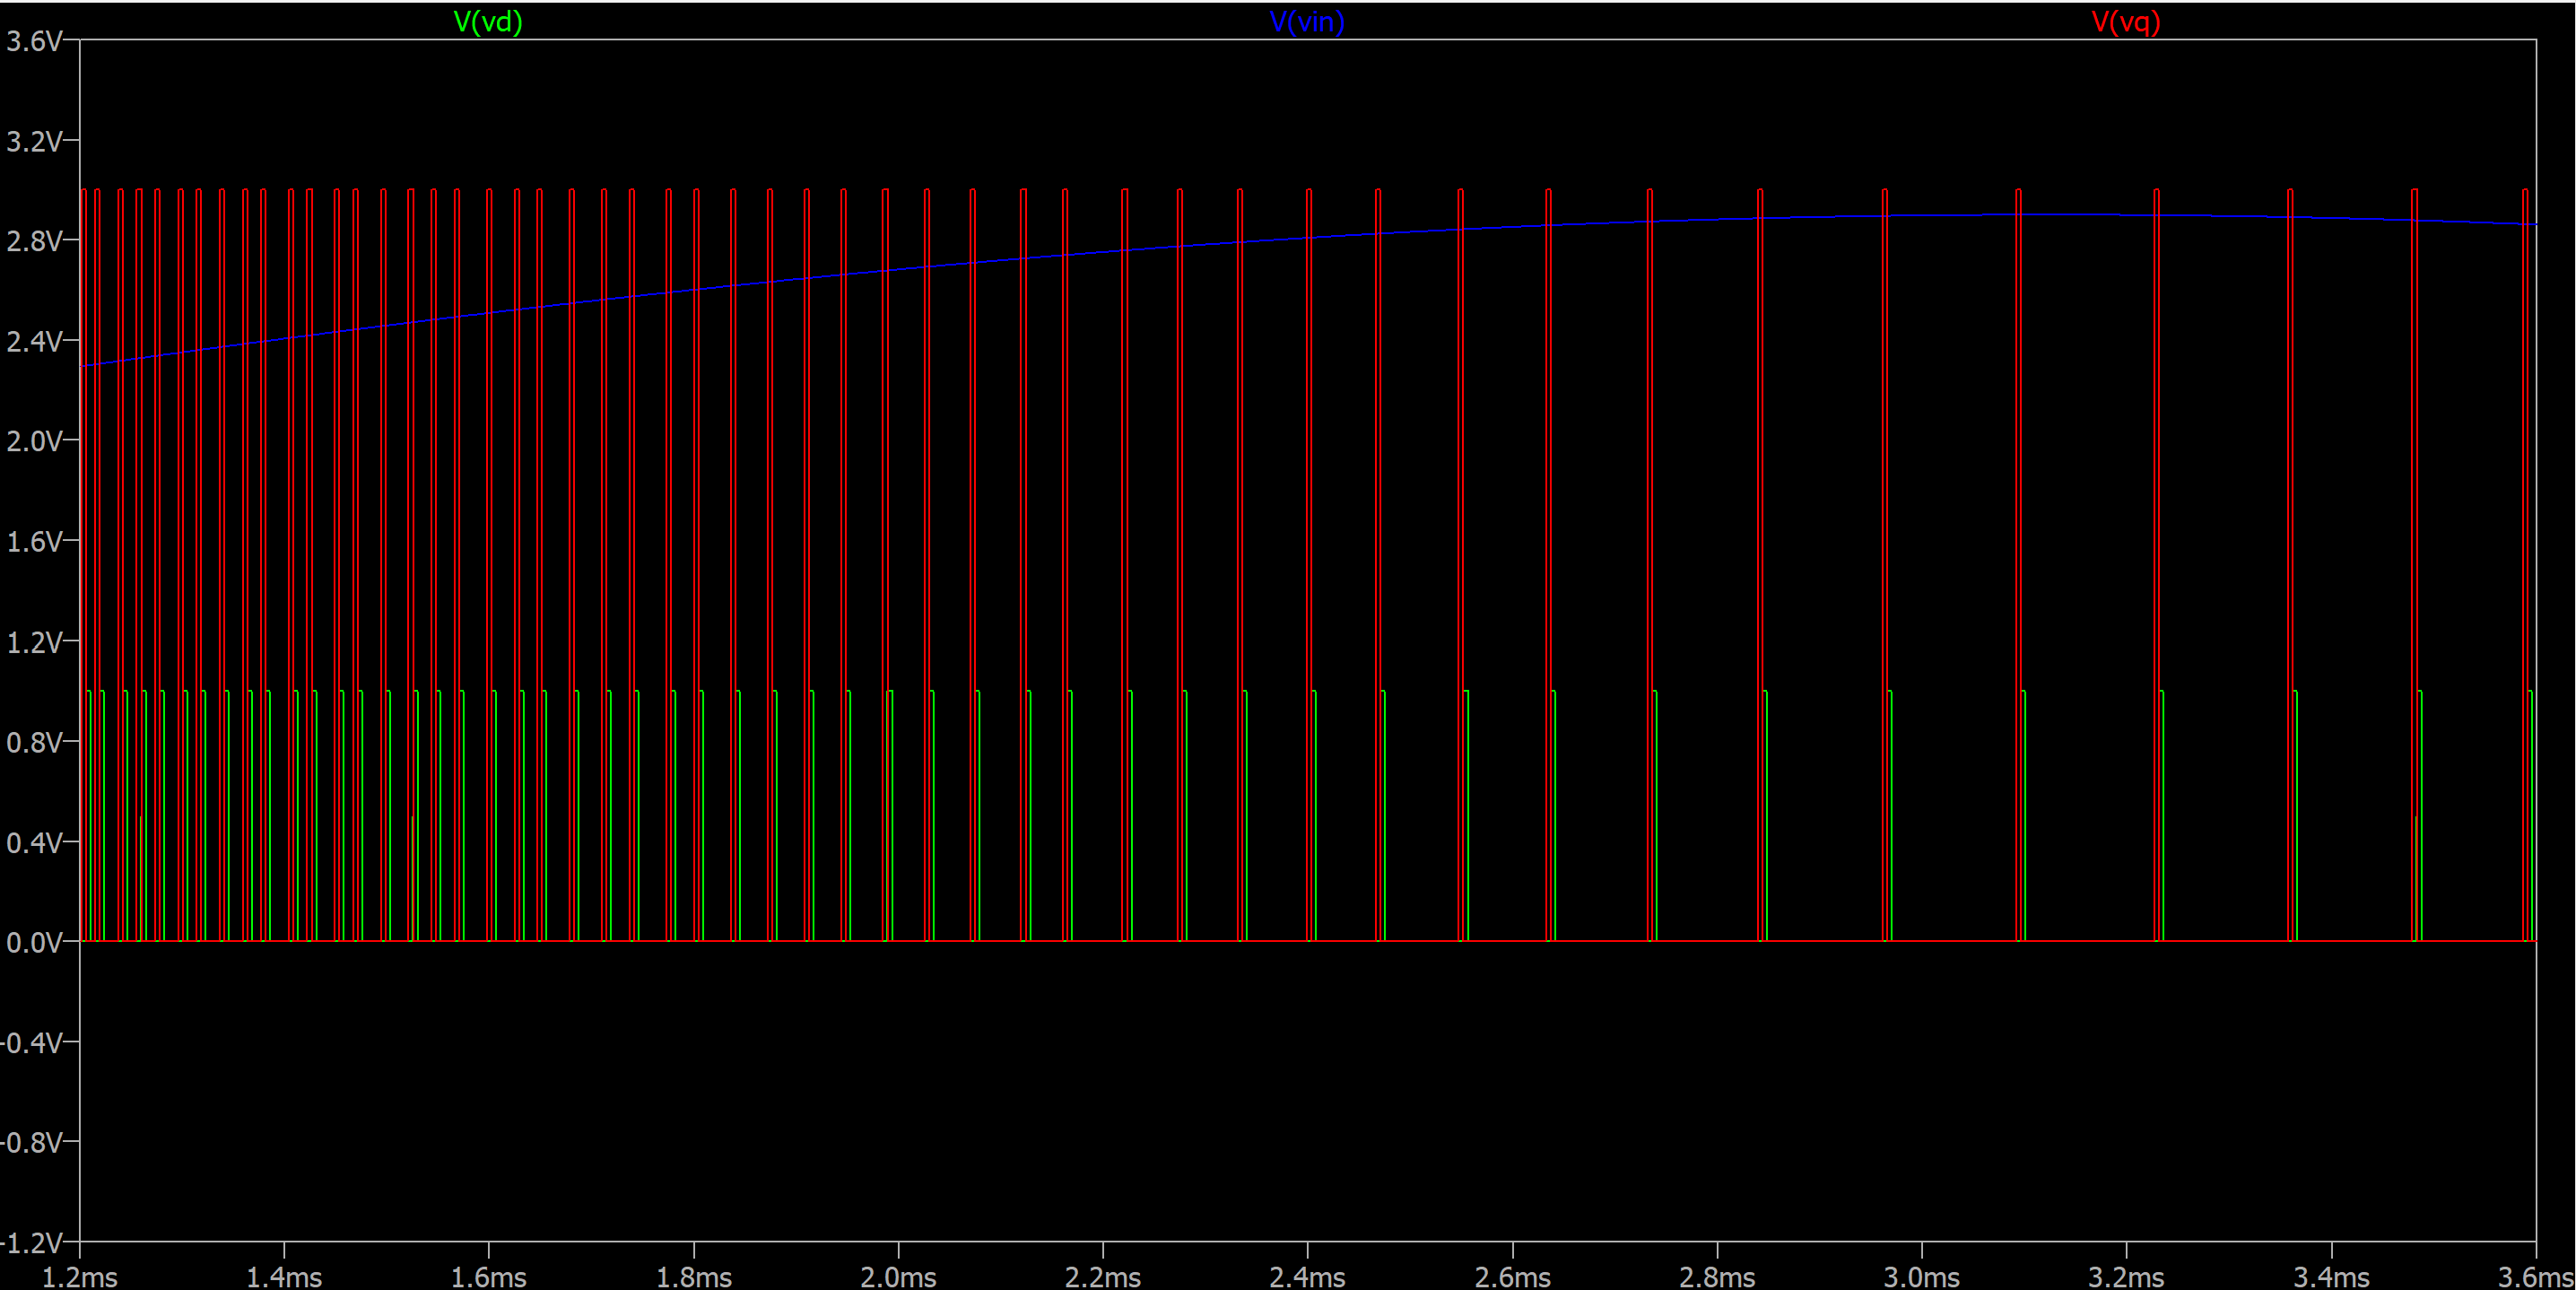

-   **Input Signal (Vin):** This is the original analog input signal to the DSM2. It can be any arbitrary waveform, but for simplicity, we consider a sine wave.

-   **Integrator Outputs:**

    -   **vx1 (Output of the First Integrator):**
        -   Expected to exhibit a ramp-like behavior.
        -   The slope of the ramp will depend on the amplitude and polarity of the input signal.
        -   Noise will be present due to the quantization process and the inherent noise of the op-amp.
    -   **vx2 (Output of the Second Integrator):**
        -   Will have a smoother waveform compared to vx1 due to the second integration stage.
        -   Noise levels should be further reduced compared to the first integrator's output.
        -   The waveform may exhibit more complex shapes depending on the input signal and circuit parameters.

-   **Quantized Output (vq):**

    -   This is the primary output of the DSM2.
    -   It's a digital signal switching between two levels (e.g., '0' and '1' or 'high' and 'low').
    -   This bitstream represents the quantized version of the input signal.
    -   Due to the noise shaping, the bitstream will appear more random and contain less low-frequency noise compared to a 1st-order DSM.

**DSM2 Operation**

The DSM2 operates as follows:

1.  **Sampling:** The input signal (`Vin`) is sampled at regular intervals determined by the clock signals `phi1` and `phi2`.
2.  **First-Stage Integration:** The sampled input signal is integrated by the first op-amp, resulting in a ramp-like voltage (`vx1`) at its output.
3.  **Second-Stage Integration:** The output of the first integrator (`vx1`) is further integrated by the second op-amp, generating a second-order integrated signal (`vx2`).
4.  **Quantization:** The comparator compares the output of the second integrator (`vx2`) to the reference voltage (`VCM`). If `vx2` exceeds `VCM`, the comparator output (`vq`) goes high; otherwise, it stays low.
5.  **Feedback:** The quantized output (`vq`) is fed back to the input stage, influencing the subsequent integration process and contributing to noise shaping.

**Noise Shaping**

-   The 2nd-order DSM's key advantage is its enhanced noise shaping.
-   The cascading of two integrators pushes quantization noise to higher frequencies.
-   This means that the noise in the output bitstream is concentrated at frequencies above the signal band of interest.
-   This noise shaping is crucial for achieving higher resolution and improved dynamic range.

**Advantages of 2nd-Order DSM**

-   **Higher Resolution:** Due to improved noise shaping, the 2nd-order DSM generally achieves higher resolution compared to the 1st-order design.
-   **Enhanced Performance:** The 2nd-order architecture provides better dynamic range and lower distortion.

## Conclusion

The 2nd-order Delta-Sigma Modulator is a sophisticated architecture that offers significant advantages over its 1st-order counterpart. By employing two cascaded integrators, it achieves enhanced noise shaping, higher resolution, and improved overall performance. The analysis and simulation of the DSM2 circuit are crucial for understanding its behavior, optimizing its design, and achieving desired performance in practical applications.

## Findings

### 1st Order Delta-Sigma Modulator

-   **Performance**:
    -   Moderate noise shaping observed.
    -   Suitable for low-resolution applications.
-   **Challenges**:
    -   Limited noise suppression at higher frequencies.
-   **Industry Applications**:
    -   Audio ADCs (e.g., Texas Instruments PCM1808).
    -   Low-power sensor interfaces.

### 2nd Order Delta-Sigma Modulator

-   **Performance**:
    -   Improved noise shaping compared to 1st order.
    -   Higher resolution achieved.
-   **Challenges**:
    -   Increased complexity and stability concerns.
-   **Industry Applications**:
    -   Precision measurement equipment.
    -   High-resolution data acquisition systems.

### Comparison of 1st and 2nd Order Modulators

| Feature           | 1st Order Modulator | 2nd Order Modulator  |
|-------------------|---------------------|----------------------|
| **Noise Shaping** | Moderate            | Improved             |
| **Complexity**    | Low                 | Higher               |
| **Stability**     | More stable         | Less stable          |
| **Applications**  | Low-resolution ADCs | High-resolution ADCs |

## Industry Applications and Case Studies

### Audio Processing

-   Delta-Sigma ADCs are extensively used in audio applications due to their high resolution and noise shaping capabilities.
-   Example: Texas Instruments' **PCM1808** audio ADC.

### Precision Measurement

-   High-order Delta-Sigma ADCs are employed in multimeters and data acquisition systems for accurate signal measurement.
-   Example: Analog Devices' **AD7124-8** precision ADC.

### Sensor Interfaces

-   Industrial sensors, such as temperature and pressure sensors, often use Delta-Sigma ADCs for high-resolution signal conversion.
-   Example: Maxim Integrated's **MAX11270** for industrial sensor applications.

## Challenges and Recommendations

### Challenges

1.  **Stability**:
    -   Higher-order modulators are prone to instability.
    -   Requires careful design and tuning.
2.  **Complexity**:
    -   Increased component count and design complexity for 2nd order modulators.
3.  **Clock Jitter**:
    -   High clock frequencies can introduce jitter, affecting performance.

# Design and Analysis of a 5-Transistor OTA in LTSpice

## Introduction

Here we present the design, simulation, and analysis of a **5-Transistor Operational Transconductance Amplifier (5T OTA)**. The OTA was implemented in **LTSpice** using the **130nm bulk technology library** provided by Hochschule Kempten. The primary objective was to replace the **integrator opamp** in the Delta-Sigma Modulator with the designed OTA and evaluate its performance.

## OTA Design and Implementation

The design of the **5T OTA** was based on the methodologies outlined in the [Analog Circuit Design](https://iic-jku.github.io/analog-circuit-design/#sec-basic-ota) resource from Johannes Kepler University Linz. This reference provided essential guidelines for **transistor sizing** and **biasing strategies**.

The OTA topology consists of: - **Input Differential Pair:** - M1 & M2 (NMOS) – Convert input voltage difference into a current signal. - **Current Mirror Load:** - M5 & M6 (PMOS) – Implement a current mirror for a high-impedance load. - **Tail Current Source & Biasing:** - M3 & M4 (NMOS) – Provide tail current biasing for differential pair stability. - I1 – 20µA constant current source for biasing reference.

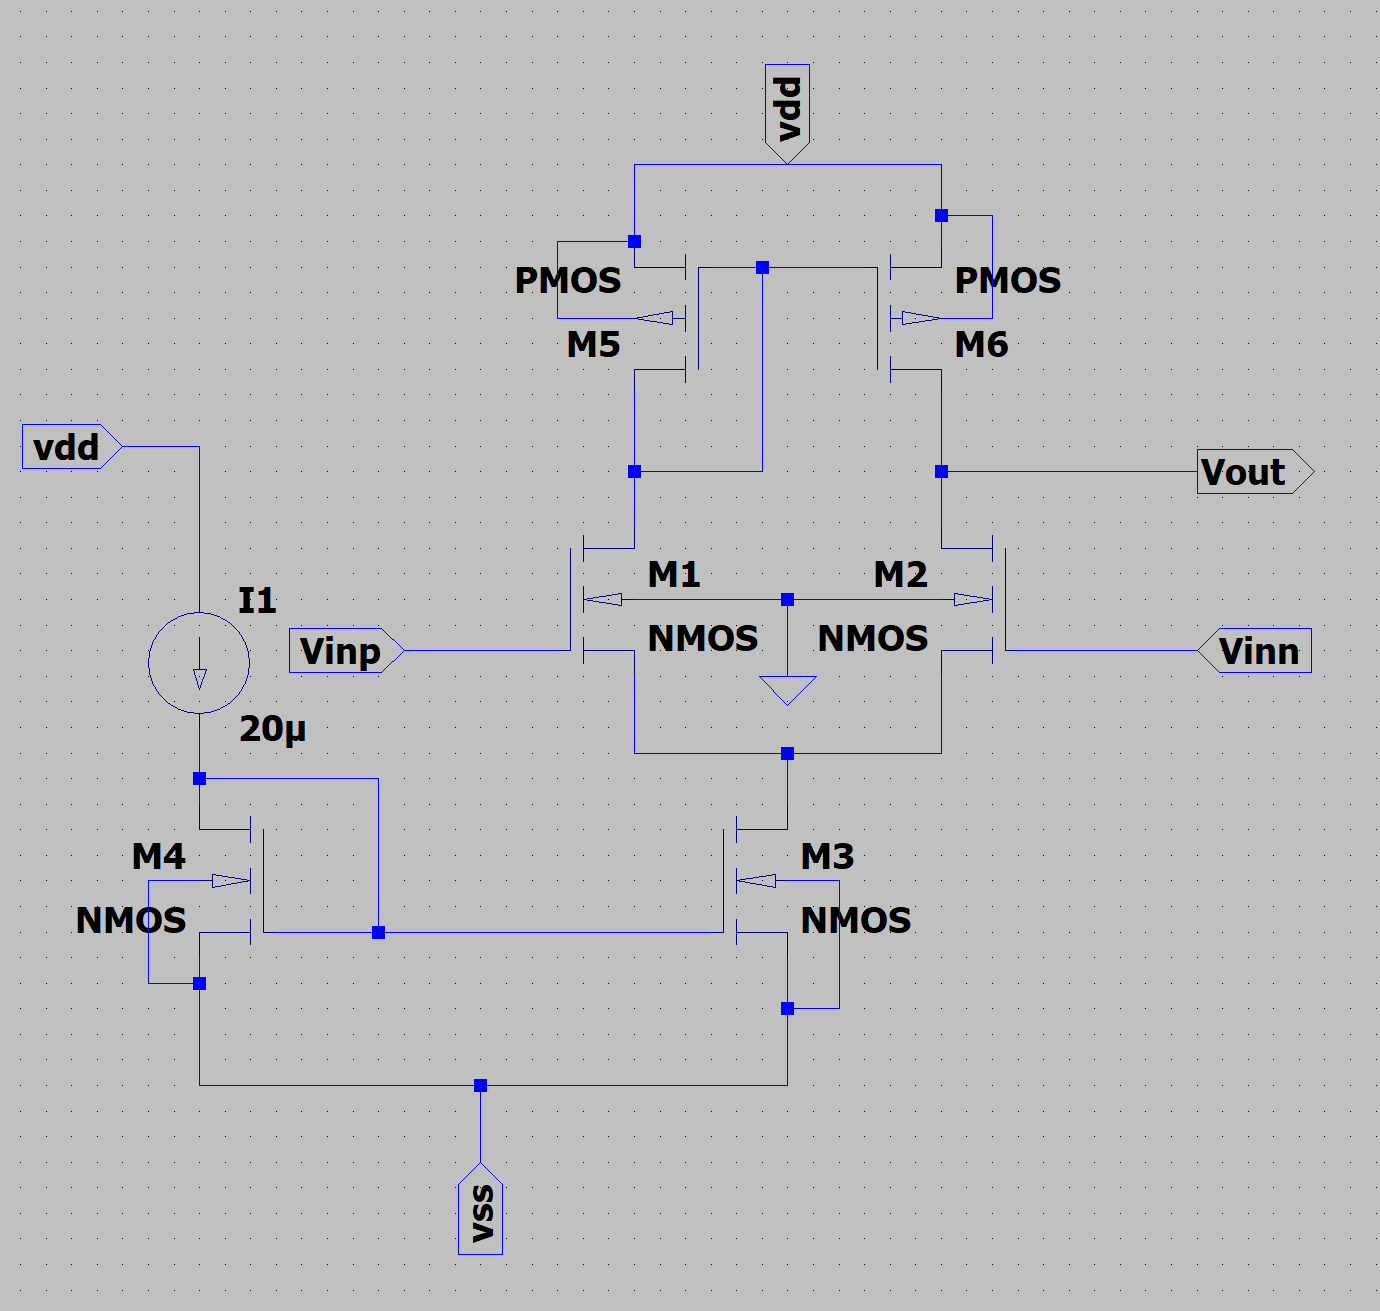

### LTSpice Subcircuit for 5T OTA

``` spice
.subckt ota_basic vdd Vinn Vinp vss Vout
I1 vdd N003 20µ
M1 N001 Vinp N002 0 NMOS l=5u w=2u
M2 Vout Vinn N002 0 NMOS l=5u w=2u
M3 N002 N003 vss vss NMOS l=5u w=0.5u
M4 N003 N003 vss vss NMOS l=5u w=2.5u
M5 N001 N001 vdd vdd PMOS l=5u w=1.5u
M6 Vout N001 vdd vdd PMOS l=5u w=1.5u
.ends ota_basic
```

## Performance in Different Applications

### Simple Comparator

1.  The OTA worked effectively, providing clear high/low transitions. 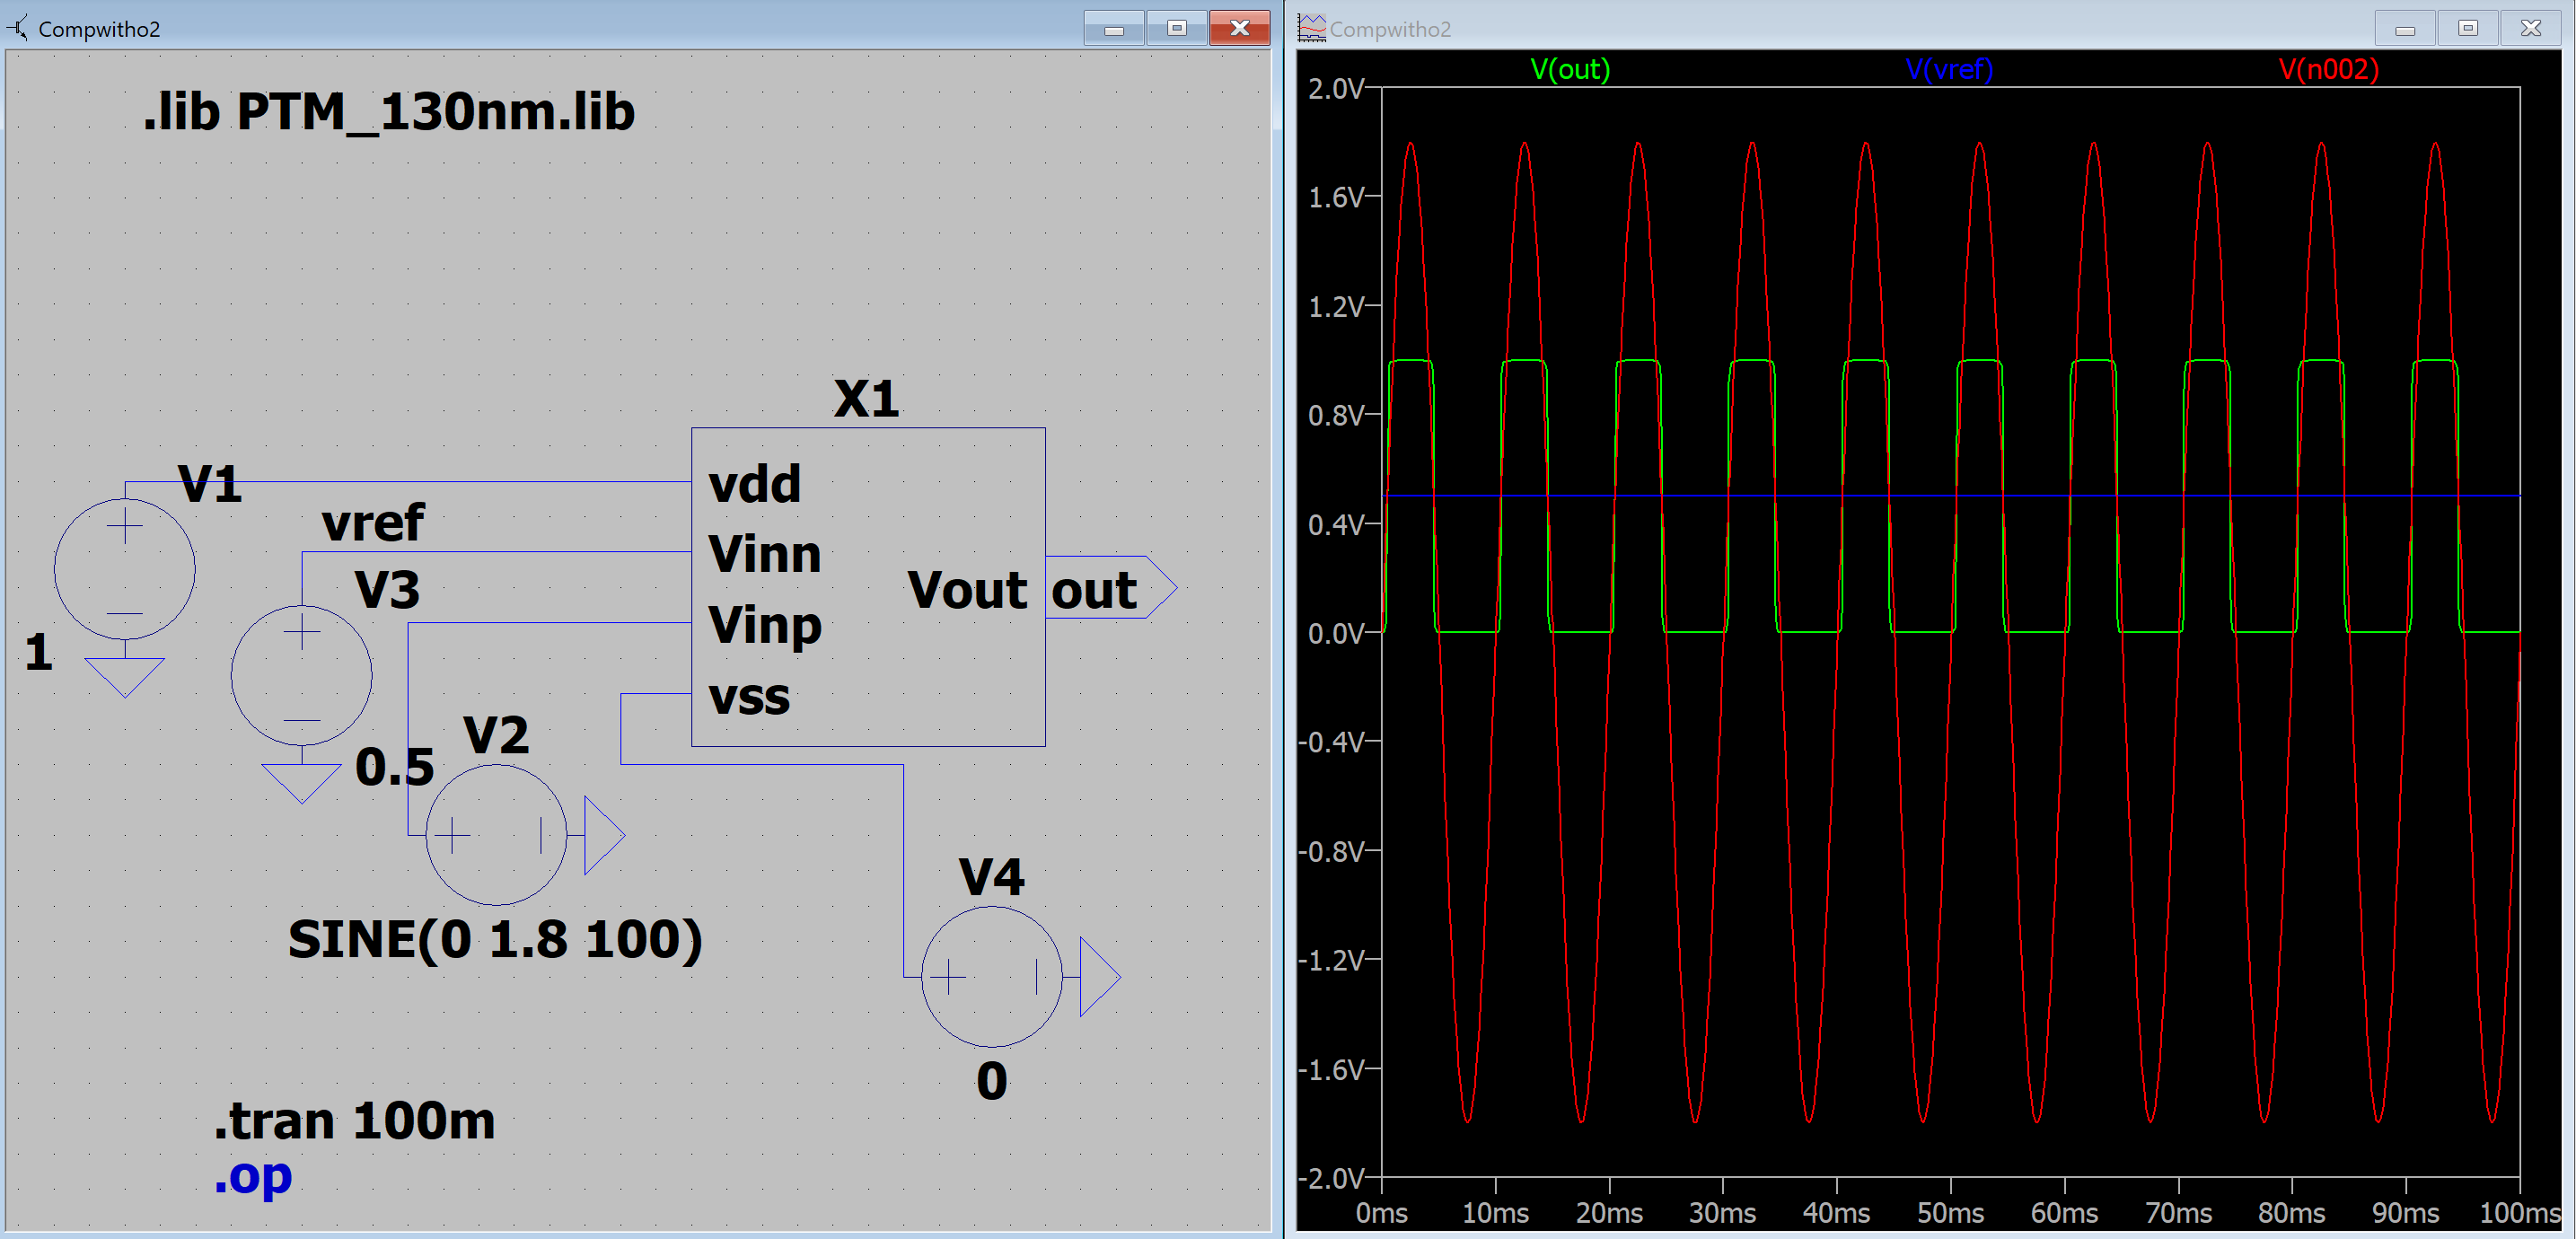 2. DSM1 Circuit The OTA **performed nearly identically** to an ideal opamp, making it a viable replacement. 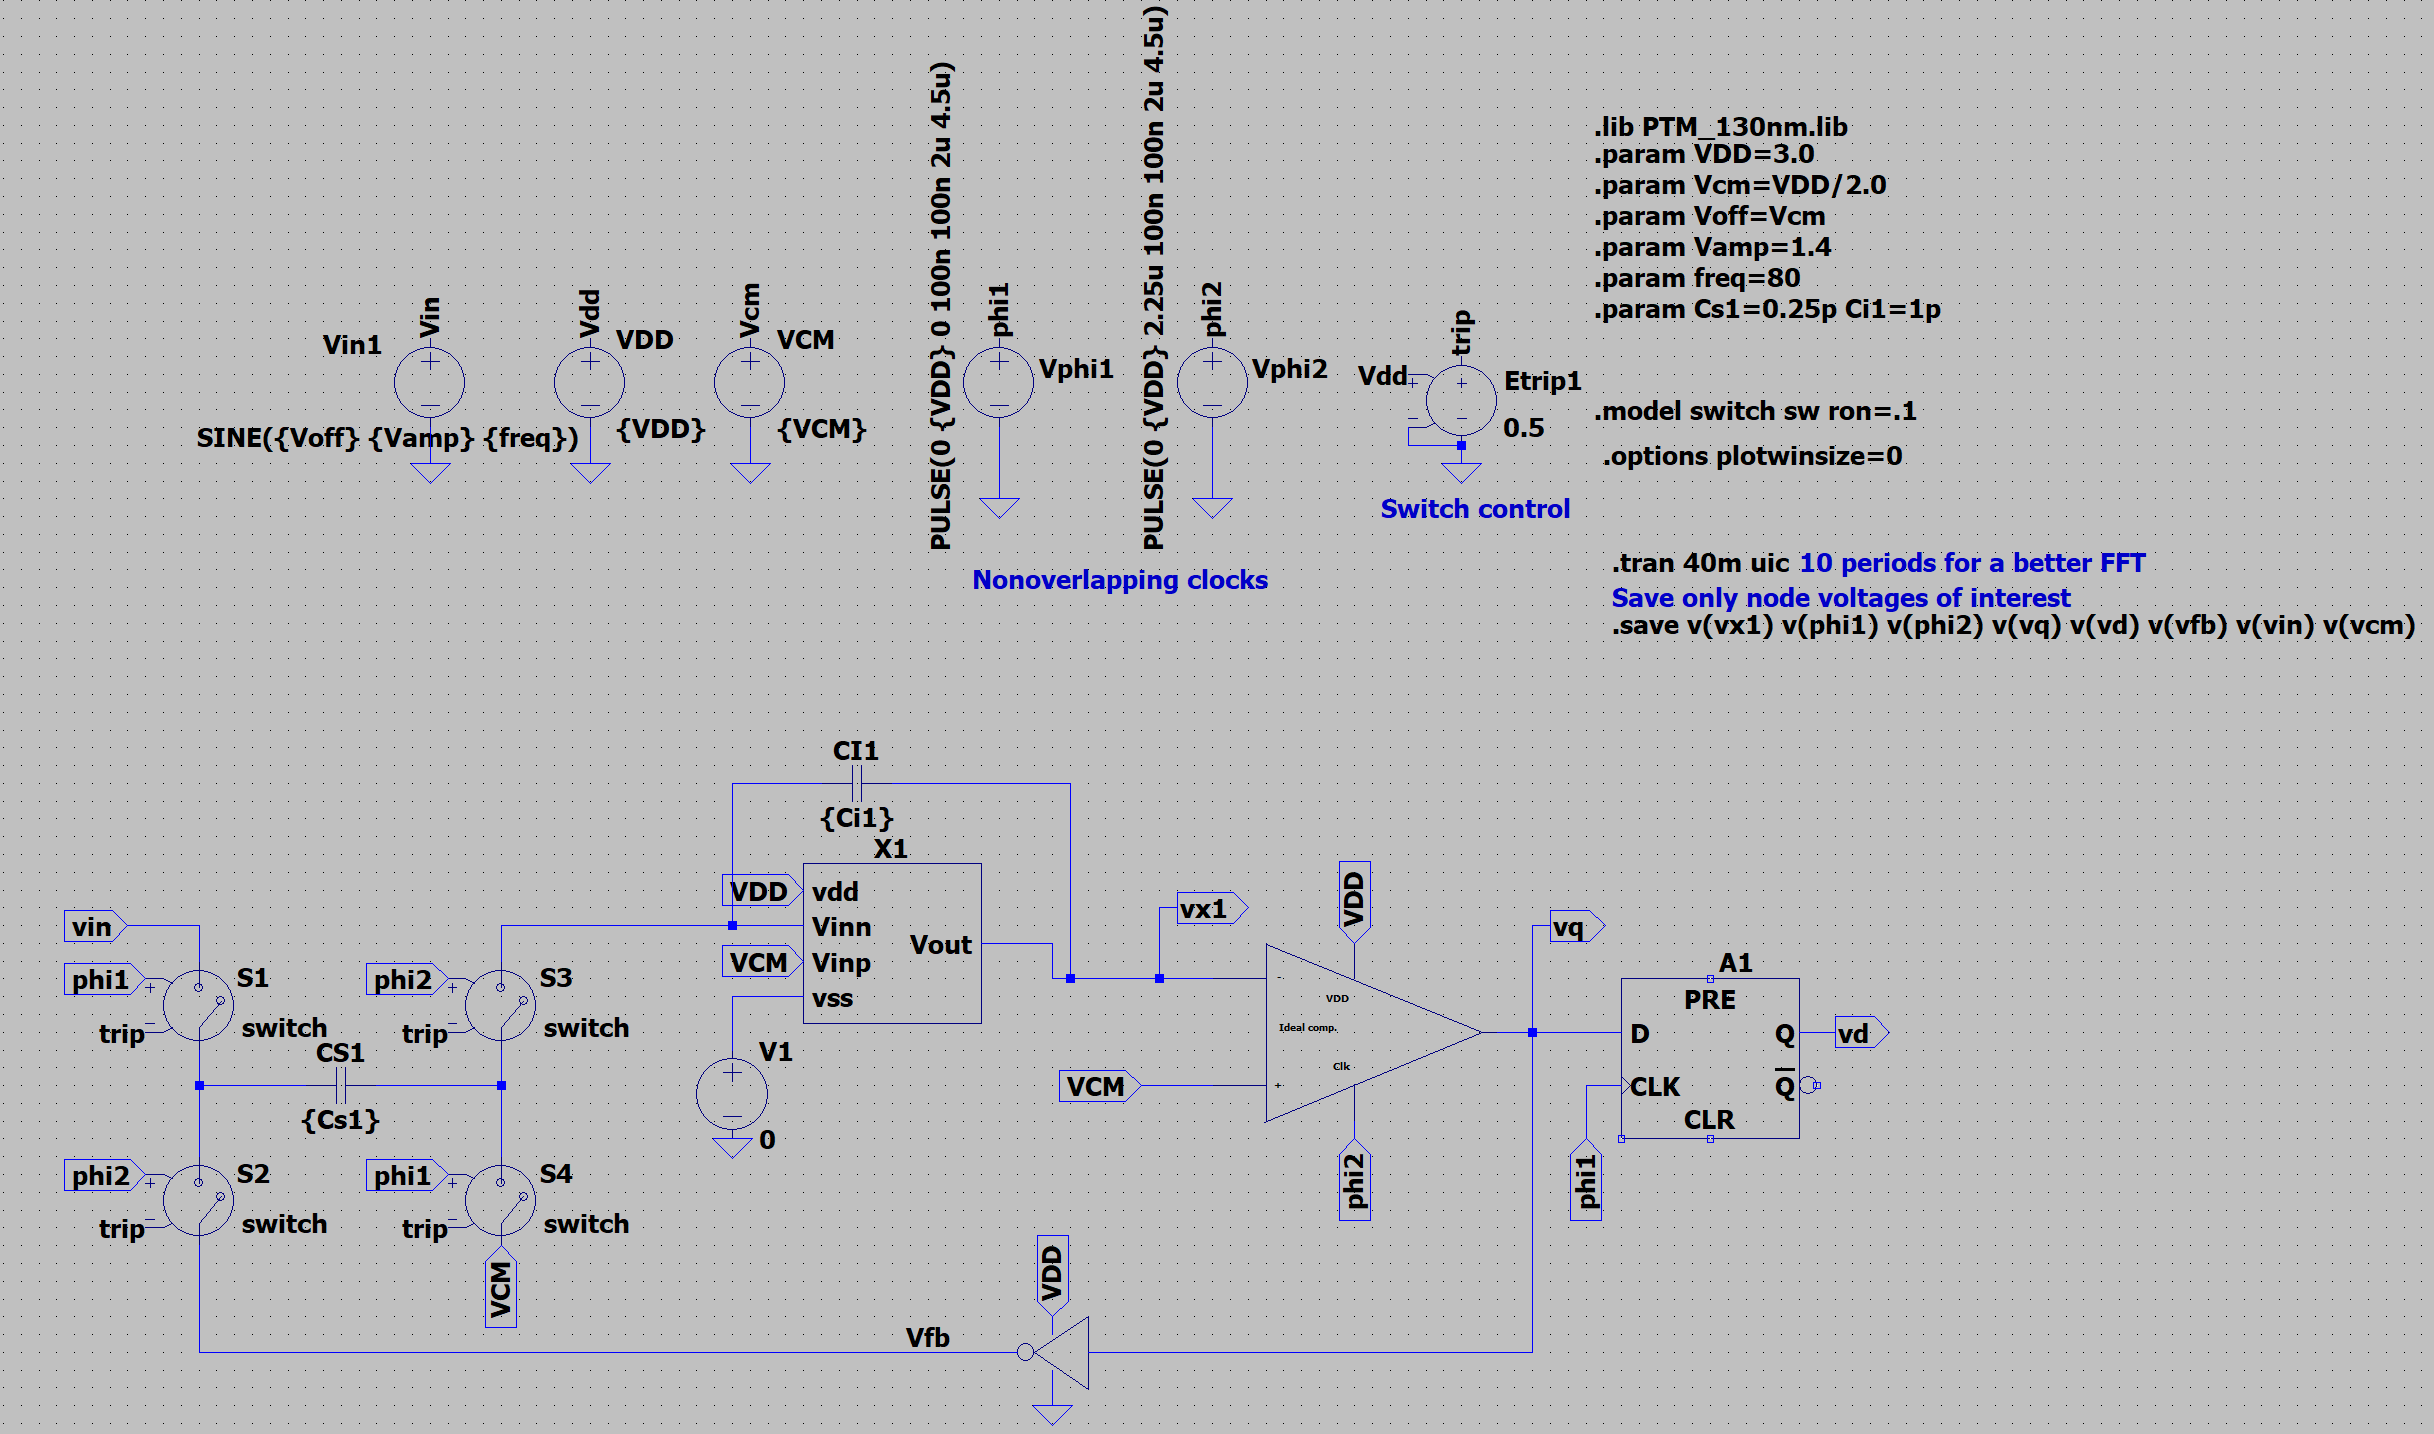 3. Comparison 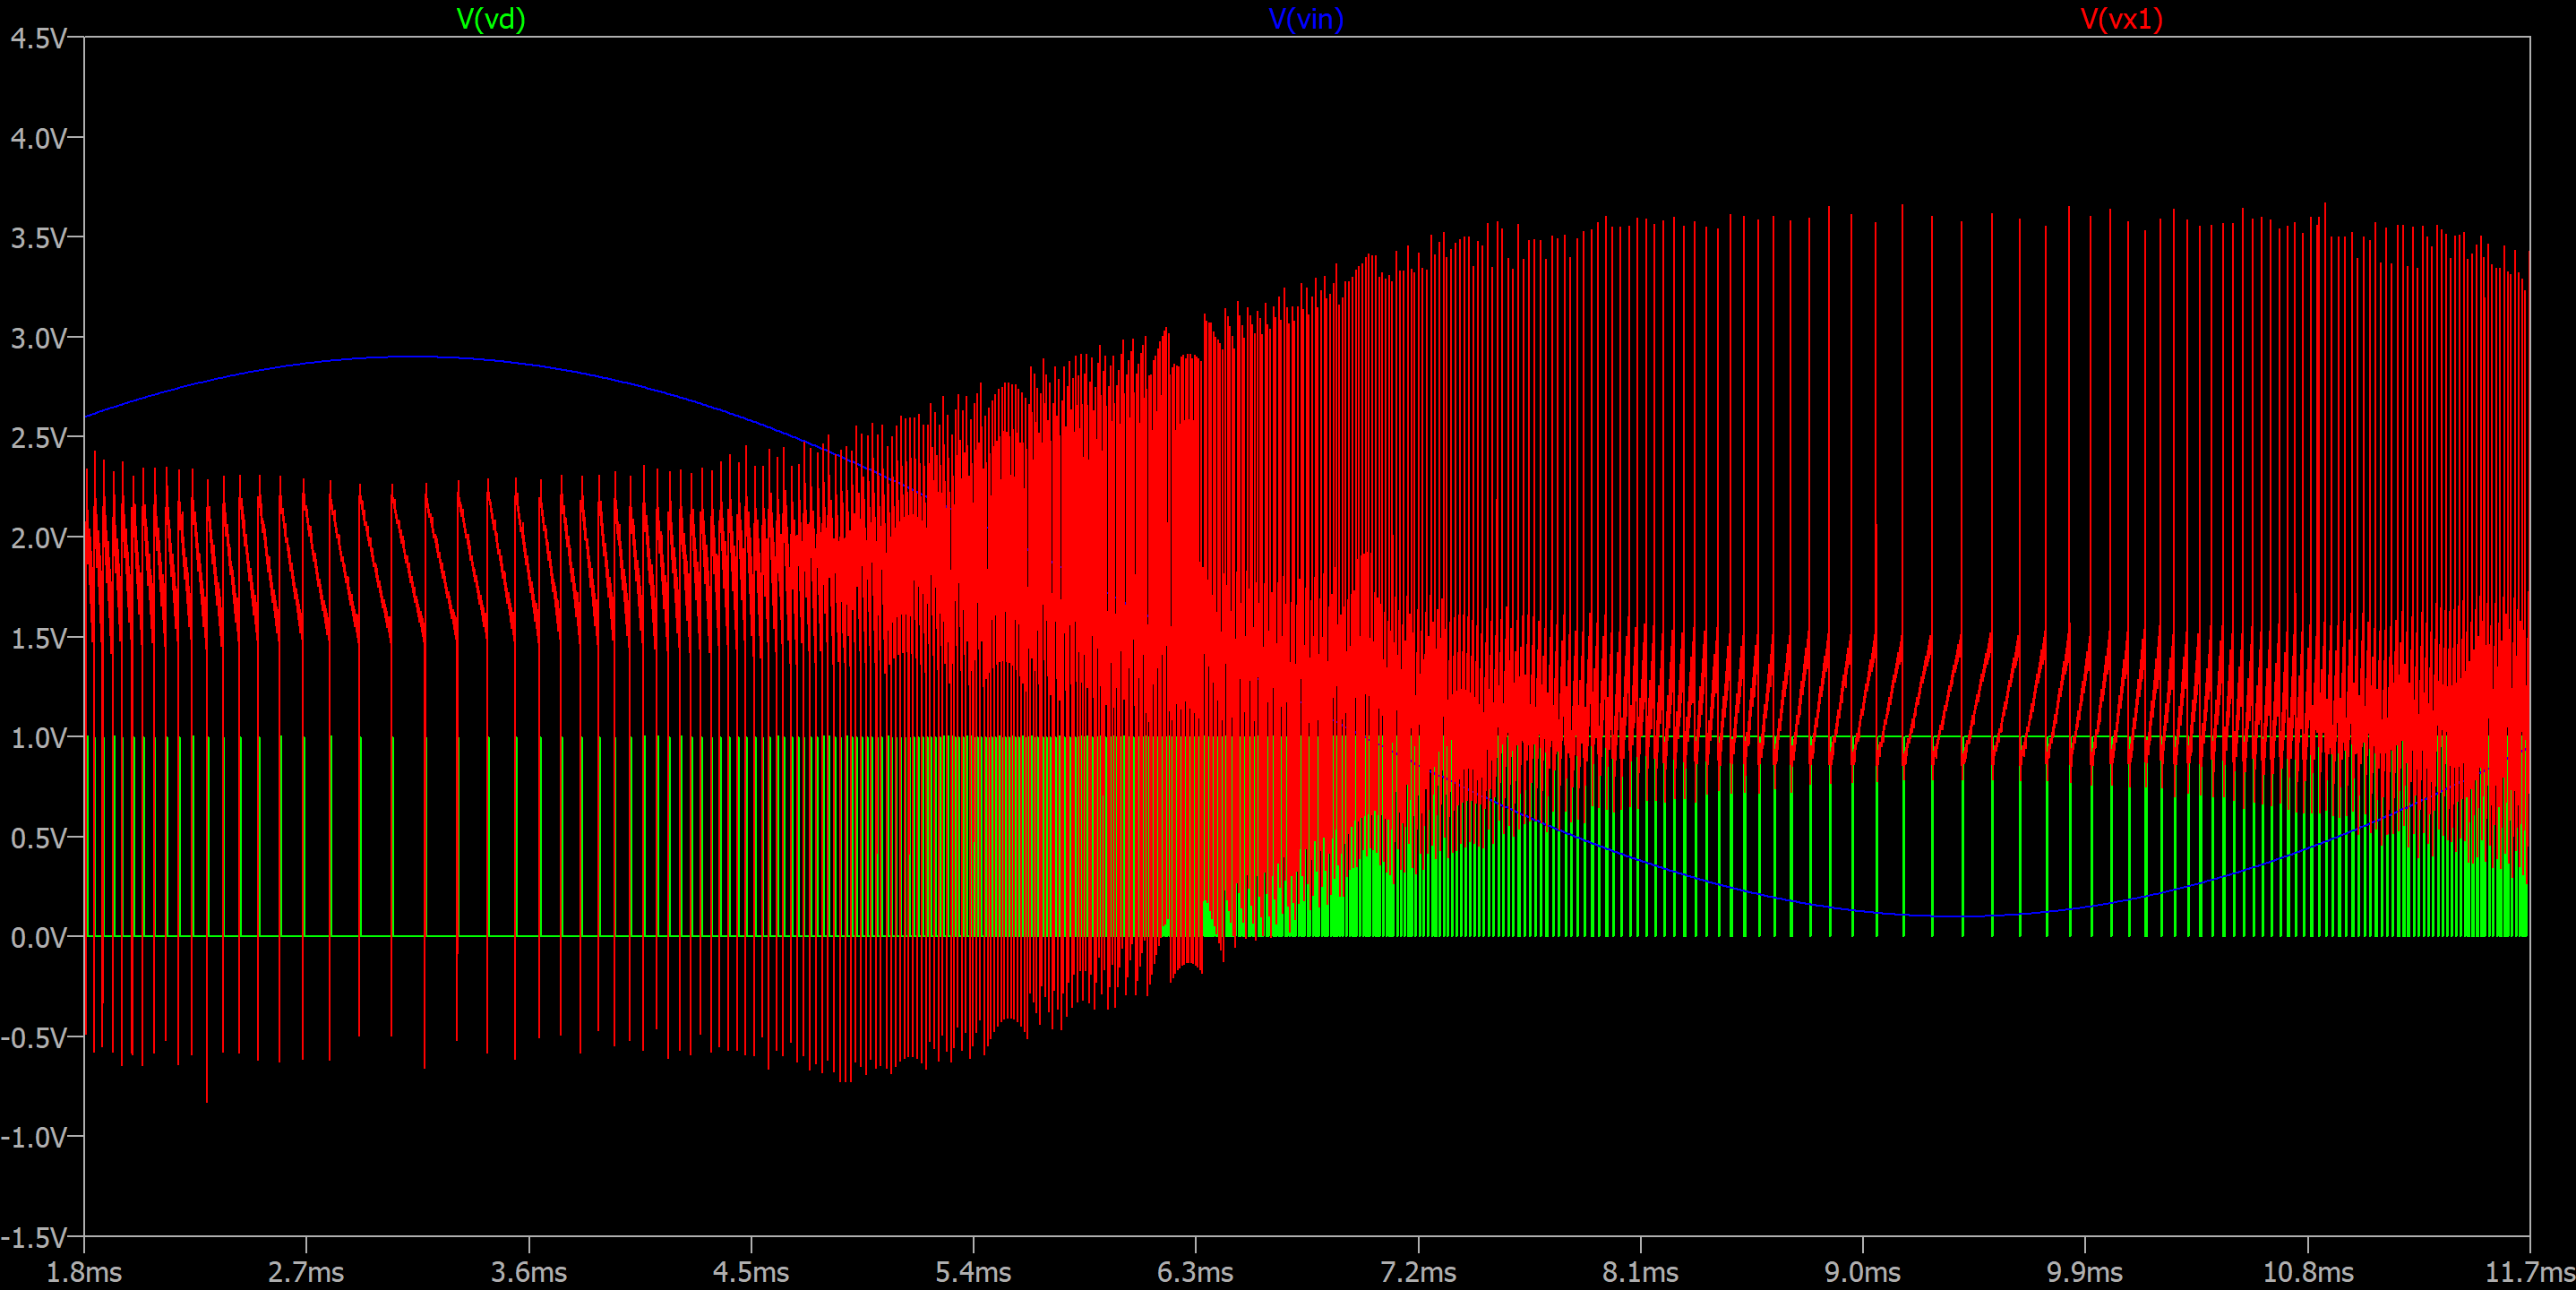

| Feature | Ideal Op-Amp Integrator | 5T OTA Integrator |
|------------------|---------------------------|---------------------------|
| Integrator Output | Linear, clean ramp | Distorted, noisy, limited swing |
| Comparator Output | Sharp, clean digital signal | Noisy, jittery transitions |
| Noise | Minimal | Significant |
| Signal Swing | Larger, utilizes full range | Limited |
| Linearity | Excellent | Poor |

#### Analysis

The significant difference in performance arises from the non-ideal characteristics of the 5T OTA compared to the ideal op-amp:

-   **Finite Gain and Bandwidth:** The 5T OTA has limited gain and bandwidth, leading to non-ideal integration behavior and reduced signal swing.
-   **Non-Linearities:** The 5T OTA exhibits non-linearities, especially for larger signal swings, distorting the integrated waveform.
-   **Noise:** The 5T OTA is more susceptible to noise due to factors like transistor mismatch and thermal noise, resulting in a noisy comparator output.

#### "Nearly the Same" Digital Output

While the *general* pattern of the digital output (V(vq) or V(Vx1)) appears similar in some respects (especially when considering long timescales or slowly varying inputs), a detailed examination reveals significant performance degradation with the 5T OTA:

-   **Average Switching Frequency:** The average switching frequency might be close, but the *instantaneous* switching times are much more irregular and noisy.
-   **Noise and Distortion:** Even if the pulse *density* seems similar, the noise and jitter in the 5T OTA output will severely impact the accuracy of the digital representation. This noise will be apparent in the frequency spectrum.
-   **Performance Metrics:** Metrics like SNR and THD will be drastically worse with the 5T OTA.

### DSM2 Circuit

The OTA **failed to meet performance requirements**. DSM2, being a second-order modulator, has an additional level of feedback and increased complexity in its loop dynamics. A higher gain is often needed to maintain the accuracy of the feedback in DSM2.

# Practical Analysis of Delta-Sigma ADCs and 5-OTA using xschem

## 1st Order Modulator Analysis

A **1st order modulator** is a key building block in **Sigma-Delta (ΣΔ) Analog-to-Digital Converters (ADCs)**. It is designed to shape quantization noise while providing high-resolution digital output. The circuit consists of four primary stages:

1.  **Input Stage (Sampling Circuit)**
2.  **Integrator**
3.  **Quantizer (Comparator + Flip-Flop)**
4.  **Feedback Loop**

The primary function of this modulator is to **shape noise**, improve signal resolution, and enable oversampling techniques for ADCs.

### Circuit Diagram with Description

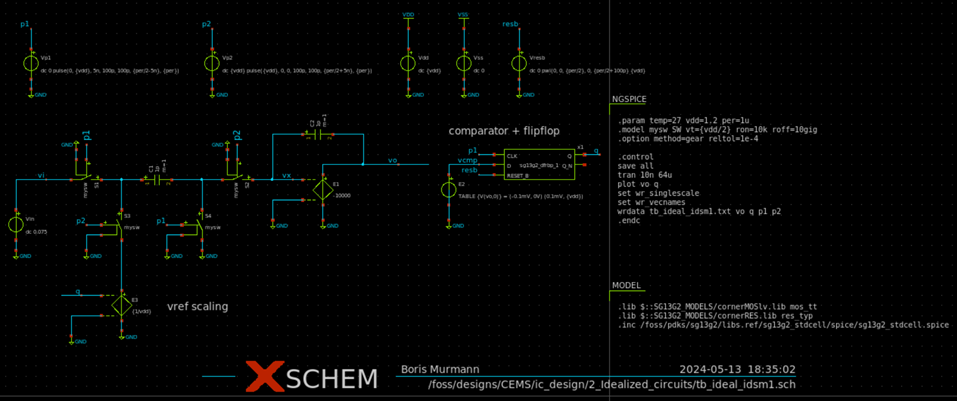

#### Input Stage (Sampling Circuit)

-   The **switched-capacitor network** samples the input signal (`Vin`).
-   **Clock Signals (`p1` and `p2`)** control the switching operation.
-   **Sampling capacitor (`C1`)** temporarily stores charge corresponding to the input voltage.

#### Integrator (Charge Accumulation)

-   The integrator accumulates the charge transferred by the switched capacitor.
-   The output voltage (`Vo`) represents the **integrated version of `Vin`**.
-   A **gain element (`E1`)** scales the output voltage appropriately.

#### Quantizer (Comparator + Flip-Flop)

-   The comparator (`E2`) compares `Vo` with a reference voltage (`Vcmp`).
-   The flip-flop latches the comparator output to generate a **stable digital signal (`Q`)**.

#### Feedback Loop

-   The digital output (`Q`) is **fed back** to control the reference voltage.
-   This ensures error correction and stabilizes the modulator operation.

### Waveform Analysis of First-Order Delta-Sigma Modulator (DSM1)

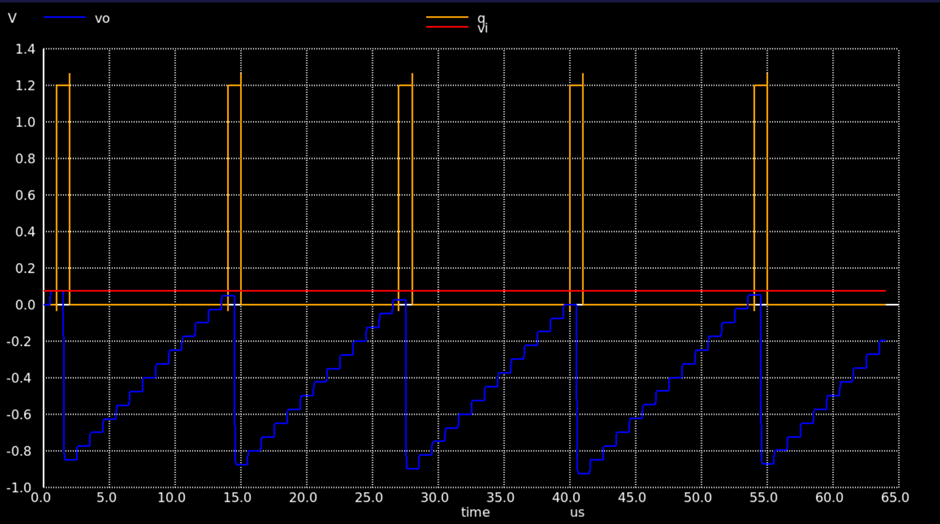

#### Input Signal (`Vi`)

-   The input voltage (`Vi`) appears as a **constant DC signal**.
-   This input is sampled and processed by the switched-capacitor circuit before integration.

#### Integrator Output (`Vo`)

-   The integrator output (`Vo`) exhibits a **staircase waveform**, which is characteristic of charge accumulation over time.
-   When a threshold is reached, the output resets, creating periodic downward transitions.
-   This behavior is essential for the noise shaping mechanism.

#### Quantized Output (`Q`)

-   The quantized output (`Q`) is switches **between high (`1`) and low (`0`) states**, functioning as a **1-bit digital representation of `Vo`**.
-   The **comparator** evaluates `Vo` against a threshold.When `Vo` crosses the threshold, `Q` **flips between `1` and `0`**.
-   This binary sequence represents a **digitized version of the input signal**.

### Operation of Each Stage

#### Sampling

1.  When `p1` is HIGH, `Vin` is **sampled** onto `C1`.
2.  When `p2` is HIGH, the stored charge is **transferred**, affecting `Vx` and `Vo`.

#### Integration

-   The capacitor **moves charge from `Vx` to `Vo`**, accumulating voltage over time.
-   This operation ensures **continuous integration of the input signal**.
-   The integrator **filters high-frequency noise**, crucial for noise shaping.

#### Quantization

1.  The **comparator (`E2`)** evaluates `Vo` against `Vcmp`.
2.  If `Vo > Vcmp`, the output **goes HIGH**, else it **goes LOW**.
3.  The **flip-flop (`x1`)** stabilizes this decision, preventing rapid oscillations.

#### Feedback

-   The **feedback loop** uses the digital output (`Q`) to adjust the reference voltage dynamically.
-   This action **corrects quantization errors**, ensuring accurate digitization.


### Noise Shaping in the Modulator

-   **Quantization noise is pushed to higher frequencies**, improving in-band SNR.
-   Due to **oversampling**, low-frequency signals retain higher accuracy.
-   **The integrator smooths the signal**, ensuring high-resolution output.
-   The **feedback mechanism minimizes error**, contributing to effective noise shaping.

## 2nd Order Modulator Analysis

A **second-order sigma-delta (ΣΔ) modulator** extends the principles of a first-order modulator by introducing a **second integrator**, which enhances noise shaping and improves resolution. It is a fundamental block in high-resolution Analog-to-Digital Converters (ADCs), particularly in applications requiring high dynamic range and low quantization noise.

A second-order ΣΔ modulator consists of the following primary stages:

1. **Input Stage (Sampling Circuit)**
2. **First Integrator**
3. **Second Integrator**
4. **Quantizer (Comparator + Flip-Flop)**
5. **Feedback Loop**

This design improves noise shaping performance by increasing the suppression of quantization noise at low frequencies.

### Circuit Diagram with Description
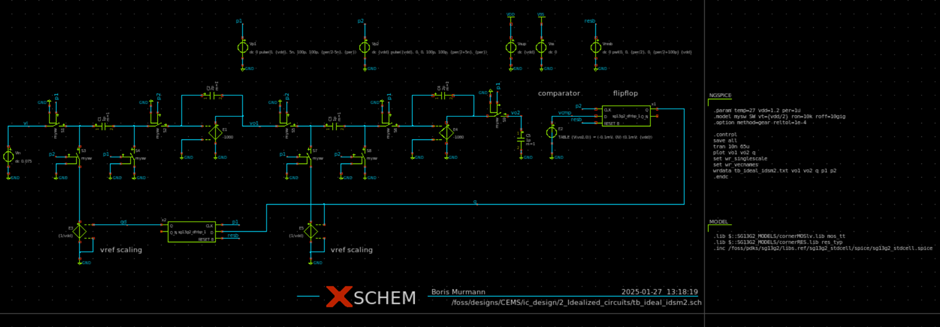

#### Input Stage (Sampling Circuit)

- The **switched-capacitor network** samples the input signal (`Vin`).
- **Clock Phases (`p1`, `p2`)** control the charge transfer process.
- **Sampling capacitor (`C1`)** temporarily stores the charge representing `Vin`.

#### First Integrator

- The **first integrator accumulates charge** from the input stage.
- It acts as a **low-pass filter**, shaping quantization noise.
- The integrator consists of an **operational amplifier (Op-Amp) and a feedback capacitor (`C2`)**.
- Output (`Vo1`) represents the first level of integration.

#### Second Integrator

- The output of the first integrator is fed into the **second integrator**.
- This stage further shapes the noise, improving quantization noise suppression.
- The **output (`Vo2`)** is an enhanced version of `Vo1`, ensuring better noise shaping.

#### Quantizer (Comparator + Flip-Flop)

- The **comparator (`E2`)** determines whether `Vo2` is above or below a reference (`Vcmp`).
- The **flip-flop (`x1`)** stabilizes the digital decision, preventing unintended toggling.
- The **output (`Q`)** is a 1-bit representation of `Vo2`.

#### Feedback Loop

- The digital output (`Q`) is **fed back via a Digital-to-Analog Converter (DAC)**.
- The feedback adjusts the reference voltage dynamically, reducing errors and improving stability.
- The feedback is applied to both integrators, ensuring system stability and enhancing linearity.

### Waveform Analysis of Second-Order Sigma-Delta Modulator
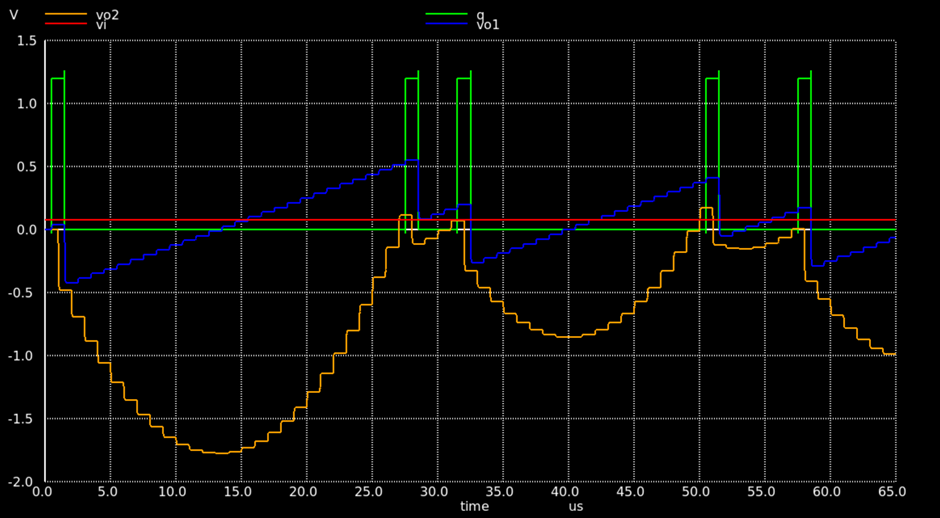

#### Input Signal (`Vi`)

- This is the **original analog signal** that is sampled and processed.
- The signal is sampled and processed in discrete steps.

#### Integrator Outputs

##### `Vo1` (Output of 1st Integrator)
    - The first integrator accumulates the input signal, forming a **staircase pattern**.
    - The output shows gradual upward and downward movement, reflecting charge accumulation and discharge.
    - `Vo1` acts as a **low-pass filter**, preventing high-frequency noise from dominating.
    - This signal represents the first level of **quantization noise shaping**.
    
##### `Vo2` (Output of 2nd Integrator)
    - Further smooths `Vo1`, providing additional **noise shaping**.
    - The waveform appears more **oscillatory**, reflecting improved quantization noise suppression.
    - The orange waveform is **less staircase-like than** `Vo1`, meaning that the second integration has smoothed out variations.

#### Quantized Output (`Q`)

- The quantized signal (`Q`) alternates between `1` and `0`, representing the **digital version** of the modulated input.
- The **comparator makes decisions** based on `Vo2`, generating the digital output.
- Rapid toggling indicates **feedback-driven quantization**.
- The **feedback loop ensures accurate digital representation**.

### Operation of Each Stage

#### Sampling

1. When **`p1`**** is HIGH**, `Vin` is sampled onto `C1`.
2. When **`p2`**** is HIGH**, the charge is transferred to the first integrator.

#### First Integration

- The first integrator accumulates charge, integrating the input over time.
- The output (`Vo1`) represents the **summed charge**, shaping quantization noise.

#### Second Integration

- The second integrator further processes `Vo1`, adding another layer of **noise shaping**.
- This stage ensures higher accuracy and better **low-frequency noise suppression**.

#### Quantization

1. The **comparator (****`E2`****)** compares `Vo2` with `Vcmp`.
2. If `Vo2 > Vcmp`, the output is HIGH (`1`), else LOW (`0`).
3. The **flip-flop (****`x1`****)** stabilizes the output to prevent spurious transitions.

#### Feedback Loop

- The **feedback DAC converts ****`Q`**** back to an analog signal**.
- This signal is **subtracted from the input**, reducing error and improving linearity.
- The feedback is applied to both integrators, maintaining **stability** and **dynamic range**.

### Noise Shaping in the Modulator

- **Quantization noise is pushed to even higher frequencies** compared to a first-order modulator.
- The **integrators act as low-pass filters**, ensuring high SNR and improved resolution.

### Advantages Over First-Order Modulator

- **Improved Noise Shaping:** Second-order modulation pushes more quantization noise to higher frequencies.
- **Higher Signal-to-Noise Ratio (SNR):** Provides better SNR compared to a first-order modulator.
- **Enhanced Dynamic Range:** Two integrators result in better suppression of low-frequency quantization noise.
- **Increased Effective Number of Bits (ENOB):** More precise digital representation of analog signals.
- **Better Linearity:** Reduces in-band noise and distortion effects, improving performance for high-precision applications.

## Five-Transistor Operational Transconductance Amplifier (OTA)

### Introduction
Here we present the design, simulation, and analysis of a **5-Transistor Operational Transconductance Amplifier (5T OTA)**. For the circuit simulation, we are using **Xcshem** for schematic entry and **ngspice** for simulation.The **130nm CMOS technology SG13G2** from IHP Microelectronics is used. The primary objective was to replace the **integrator opamp** in the Delta-Sigma Modulator with the designed OTA and evaluate its performance.

### OTA Design and Implementation
The design of the **5T OTA** was based on the methodologies outlined in the [Analog Circuit Design](https://iic-jku.github.io/analog-circuit-design/#sec-basic-ota) resource from Johannes Kepler University.
The **Five-Transistor OTA** is a fundamental building block in **analog circuits**, particularly in **low-power and high-gain applications**. 


The **5T OTA** comprises the following components:

*The circuit consists of six MOSFETs (M1 to M6) and a bias current source (Ibias)*

1. **Differential Input Pair (M1, M2)**
   - Converts the differential input voltage into a current difference.

2. **Current Mirror Load (M3, M4)**
   - Provides high gain by mirroring the current and acting as an active load.

3. **Tail Current Source (M5)**
   - Sets a constant bias current for the differential pair.

4. **Biasing Circuit (M6)**
   - Generates the required bias voltage for **M5**.

5. **Bias Current Source (Ibias)**
   - Provides a stable current to the circuit. This current sets the transconductance of the OTA.

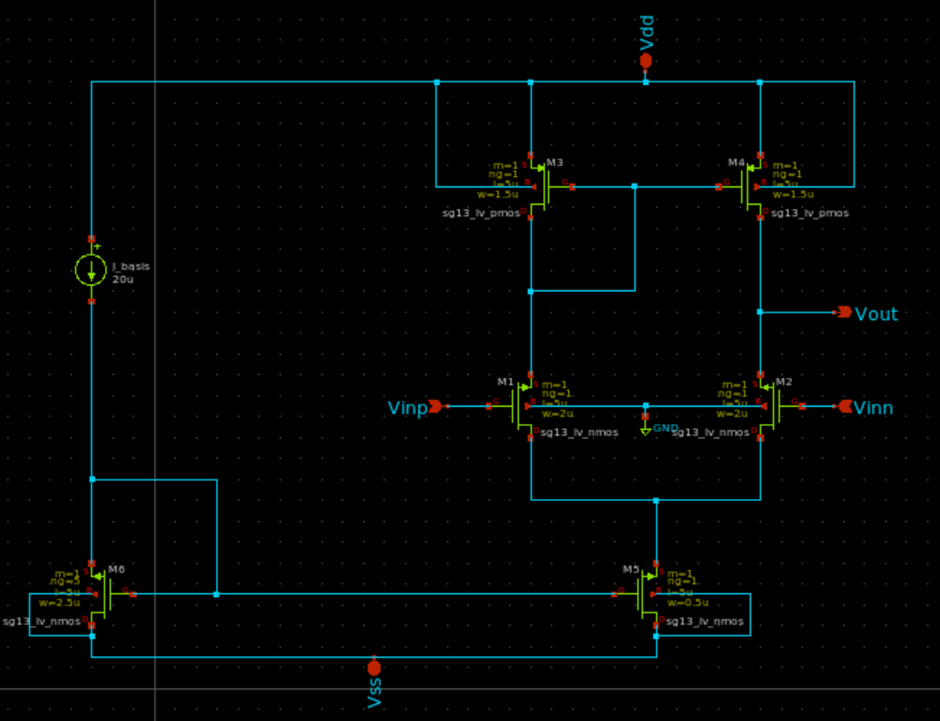

### Working of Each Component

#### Differential Input Pair (M1, M2)
- **M1 and M2** form an NMOS differential amplifier.
- They receive differential inputs **(Vin+ and Vin-)**.
- The **gate voltage difference (Vin+ - Vin-)** modulates the drain currents of M1 and M2.
- If **Vin+ > Vin-**, more current flows through **M1**, decreasing current through **M2**.

#### Current Mirror Load (M3, M4)
- **M3 and M4** form a **PMOS current mirror**, acting as an active load.
- The current in one branch is mirrored in the other branch by matching the transistor sizes and ensuring similar operating conditions.
- Converts the current difference of **M1 and M2** into a voltage output.
- Provides **high output impedance**, improving voltage gain.

#### Tail Current Source (M5)
- **M5 acts as a current source**, ensuring a **constant current bias** for the differential pair.
- Operates in **saturation mode**, ensuring that **I(M1) + I(M2) = I_bias**.
- Improves **common-mode rejection ratio (CMRR)**.

#### Biasing Circuit (M6)
- **M6 is responsible for biasing M5**, ensuring a stable operating point.
- It provides a reference current, ensuring correct **biasing of the OTA**.

### Creating a Symbol in Xschem

To use the **5T OTA** in a larger circuit, we create a symbol in Xschem.

#### Steps:
1. **Open Xschem** and the **OTA schematic**.
2. **Click "Symbol" → "Make Symbol"**.
3. **Modify the `.sym` file** (arrange input/output pins).
4. **Save and use the symbol** in new circuits.

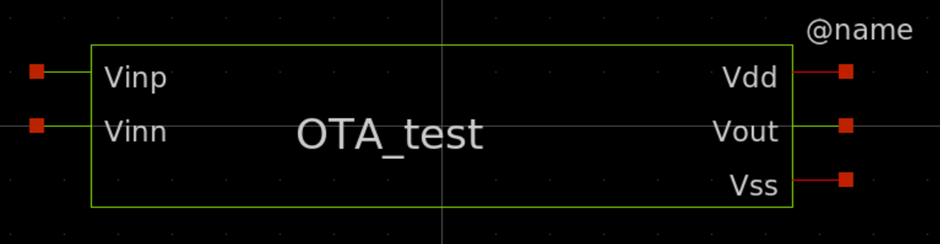

### 5T OTA Testbench and Performance Evaluation

### Voltage Buffer with OTA

In order to design an OTA we need an application, and from this we derive the circuit specifications.We have used this **OTA to function as a voltage buffer** which lightly loads an input voltage source and can drive a large capacitive load.

In designing the OTA for this voltage buffer application, we have referred to the specifications outlined in the [Analog Circuit Design resource](https://iic-jku.github.io/analog-circuit-design/#sec-voltage-buffer-with-ota). The key specifications are as follows:

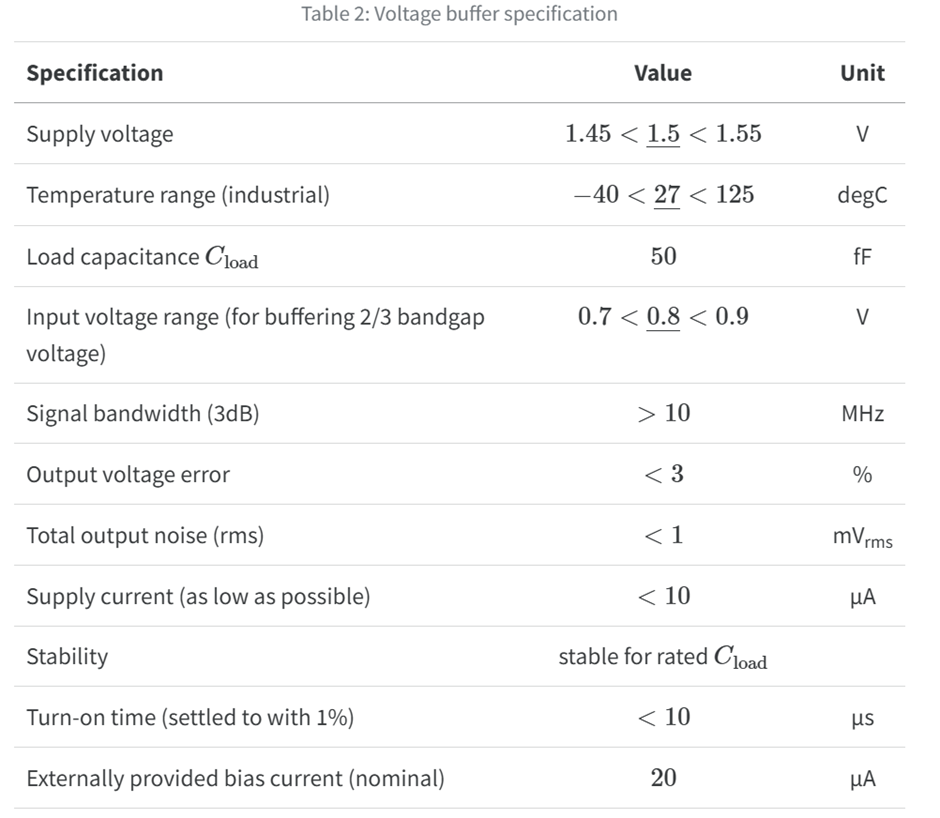

#### Circuit Diagram with Description
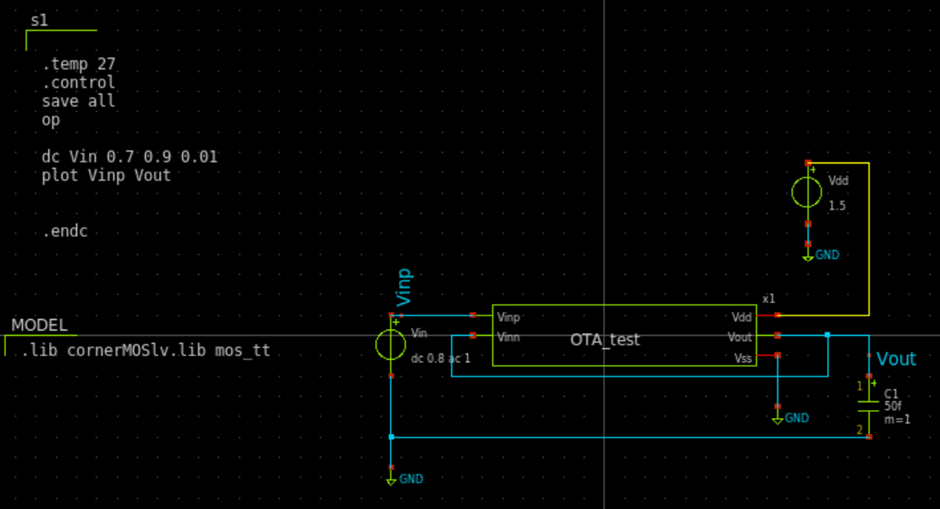

- **OTA (Operational Transconductance Amplifier):** The core component used to buffer the input voltage.
- **Input Voltage Source (Vin):** Provides a DC bias of 0.8V with an AC signal for analysis.
- **Power Supply (Vdd = 1.5V, Vss = 0V):** Supplies the OTA.
- **Capacitive Load (C1 = 50 fF):** Represents the output load.
- **DC Analysis (dc Vin 0.7 0.9 0.01):** Sweeps the input voltage from 0.7 to 0.9V in steps of 10mV.

#### Expected Waveform Analysis
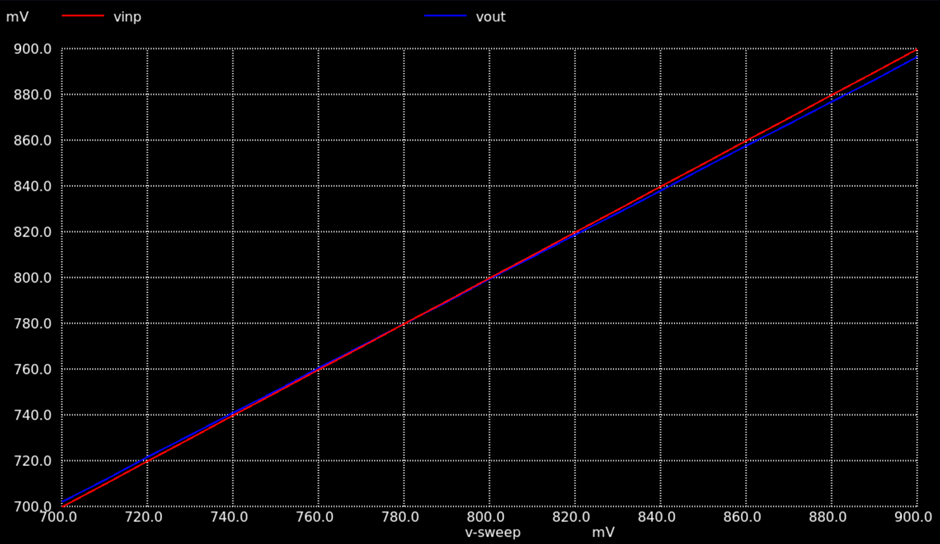

Since the OTA is used as a voltage buffer, the ideal behavior would be:
**𝑉out≈𝑉in**

### OTA as a Comparator

The circuit presented here utilizes an OTA in a comparator configuration where an AC signal is applied at the non-inverting input, and a reference voltage is provided at the inverting input. The output waveform reflects the behavior of a comparator, switching states based on the input conditions.

#### Circuit Diagram with Description
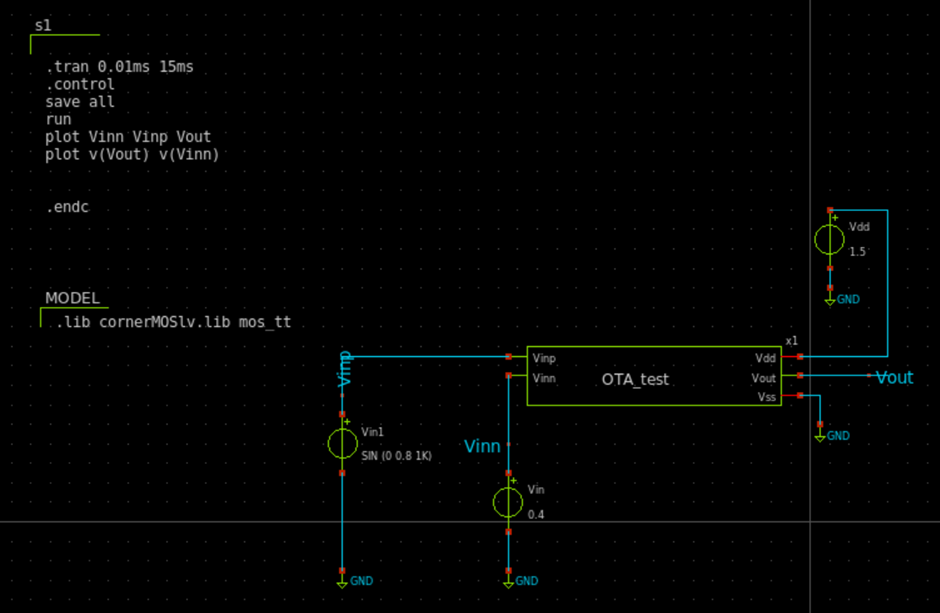

The given OTA circuit acts as a comparator. The configuration consists of:
- **Input Signal (Vin1)**: A sinusoidal signal of amplitude 0.8V and frequency 1kHz.
- **OTA Module (OTA_test)**: The core component acting as a comparator.
- **Reference Voltage (Vinn)**: A DC bias voltage of 0.4V.
- **Power Supply (Vdd)**: A 1.5V source powering the OTA.
- **Load Capacitor (50fF)**: A small capacitive load stabilizing the output.

#### Working Principle and Waveform
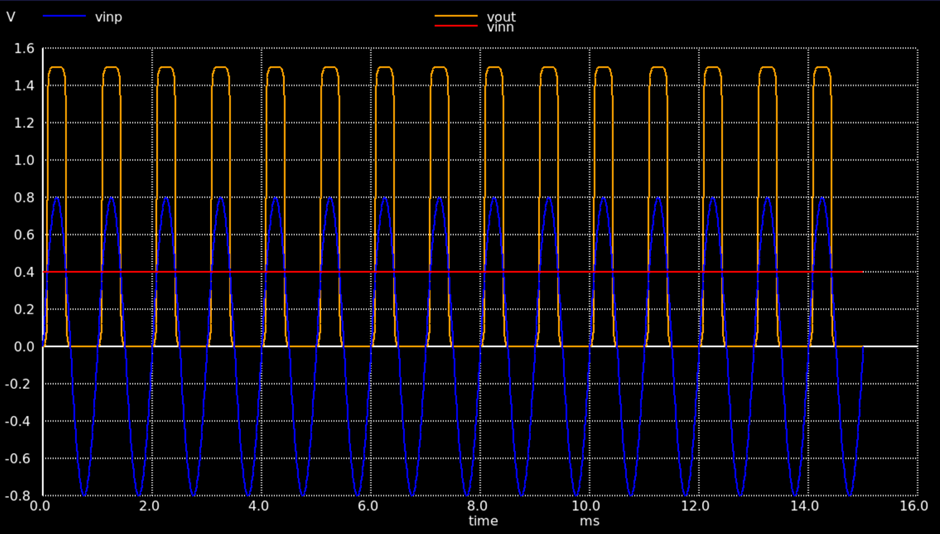

The OTA operates as a comparator where:
- When **Vinp > Vinn (0.4V)**, the output switches **high (approximately Vdd = 1.5V)**.
- When **Vinp < Vinn (0.4V)**, the output switches **low (approximately 0V)**.
- The OTA amplifies the difference between `Vinp` and `Vinn`, pushing the output to either the supply rail or ground.

### OTA as a Integrator

#### **Circuit Diagram with Description**
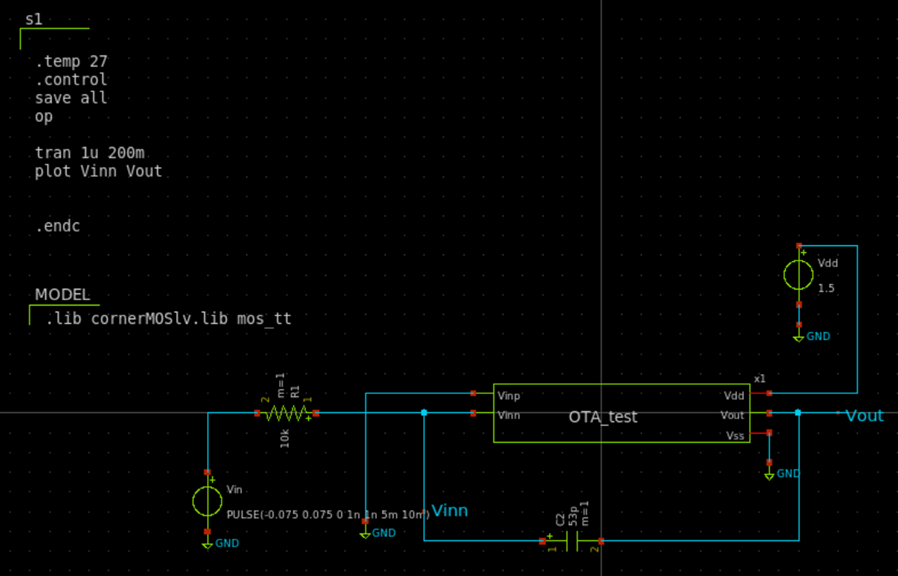

The given circuit consists of:
- **Input Voltage(Vin)** A pulse waveform acting as the input signal.
- **Resistor (10kΩ)** which converts the input voltage into current.
- **Capacitor (53pF)** which integrates the current at the output.
- **OTA Block** Acts as the active element performing integration.
- **Power supply of 1.5V**.

The OTA operates as an integrator due to the capacitor connected at the output node. The input voltage difference is converted to current, which then charges the capacitor over time, producing an integrated output waveform. Ideally, the output should be a perfect triangular waveform corresponding to the integral of the square wave input.

#### Waveform Analysis
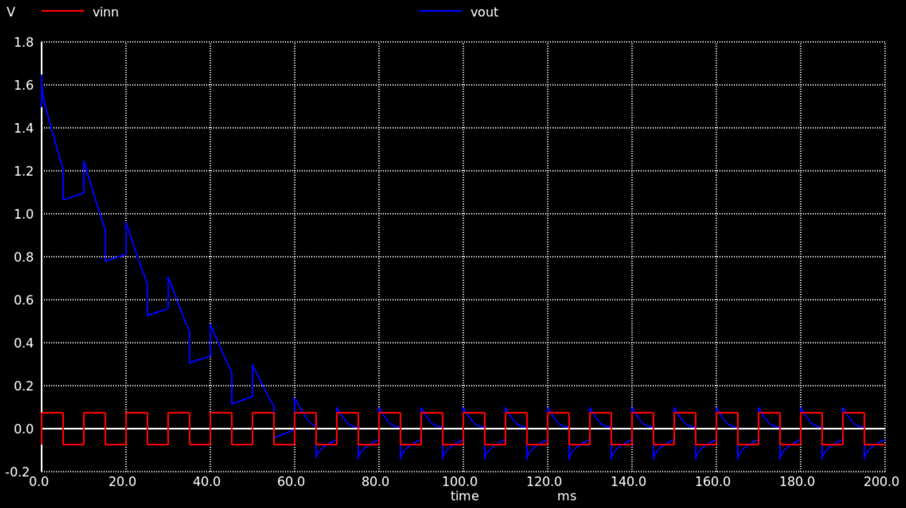

#### Expected Integrator Output:
- Ideally, an integrator should produce a **triangular wave** when driven by a square wave input.
- The integration process converts the high and low levels of the input pulse into a continuous increase or decrease in output voltage.

#### Observed Output:
- The output waveform starts high and gradually **decreases over time**, rather than forming a clear triangular wave.
- Instead of oscillating symmetrically, the **output drifts downward**, indicating a **DC bias shift**.

#### Reasons for Output Behavior

- *DC Bias Shift (Leakage Effects)* The exponential downward drift indicates that the capacitor is *losing charge over time*.
- *OTA Non-Idealities* Different design approaches need to be explored for OTA.

# Conclusion

Delta-Sigma ADCs have proven to be a **powerful and efficient** solution for high-precision signal conversion. Their ability to **reduce noise, improve resolution, and handle low-frequency signals** makes them ideal for applications in **medical devices, audio processing, and industrial sensors**.

In this work, we explored the **fundamentals of ADCs**, the **inner workings of Delta-Sigma Modulators**, and their **real-world applications**. We also **simulated** a Delta-Sigma ADC system using key components like the **ADXL335 accelerometer, ADS1115 ADC, and ESP8266 microcontroller**, ensuring practical insights into how these systems function.

Through simulations in **MATLAB, LTSpice, and Xschem**, we analyzed different ADC architectures, comparing **first and second-order Delta-Sigma Modulators** to understand their trade-offs between **accuracy, stability, and complexity**.
